# *1. Import necessary libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LinearRegression      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
mutual = pd.read_csv(r"C:\Users\mdine\Downloads\Machine Learning\Capstone Project\mutual funds\comprehensive_mutual_funds_data.csv")

In [3]:
mutual.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [4]:
mutual.tail(2)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3
813,WhiteOak Capital Ultra Short Term Fund,500,500,0.33,141.0,4,Piyush Baranwal,2.81,1.2,0.72,0.47,0.8,1,WhiteOak Capital Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,4.5,NaN


In [5]:
mutual.shape

(814, 20)

In [6]:
mutual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

**now my datatype aren't cleared and i have to change object datatype to floattype**

In [7]:
mutual['sortino']=pd.to_numeric(mutual['sortino'], errors='coerce')
mutual['alpha']=pd.to_numeric(mutual['alpha'], errors='coerce')
mutual['sd']=pd.to_numeric(mutual['sd'], errors='coerce')
mutual['beta']=pd.to_numeric(mutual['beta'], errors='coerce')
mutual['sharpe']=pd.to_numeric(mutual['sharpe'], errors='coerce')

In [8]:
mutual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

**now my datatype are cleared and i have done object datatype to floattype**

In [9]:
mutual.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,791.000000,772.000000,790.000000,772.000000,791.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.652642,2.505635,10.272696,0.822241,1.204185,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.392228,3.951573,7.805667,1.309871,0.536431,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.750000,0.530000,2.162500,0.700000,0.930000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.870000,1.855000,12.300000,0.860000,1.290000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.470000,3.847500,16.437500,0.970000,1.550000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,6.000000,5.000000,130.800000,71.400000,23.200000


# *2.Handeling missing values*

In [10]:
mutual.isnull().sum()


scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [11]:
num_data=mutual.select_dtypes(exclude='object')
num_data.head(3)

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
0,100,100,0.27,10.0,10,0.32,2.24,9.39,0.01,0.24,3,3,4.0,6.5,6.9
1,1000,1000,0.36,4288.0,10,1.33,1.53,0.72,0.56,1.10,1,3,5.6,4.8,5.5
2,1000,1000,0.53,157.0,10,3.44,2.67,10.58,0.67,1.42,5,3,2.0,18.9,9.7


In [12]:
cat_data=mutual.select_dtypes(include='object')
cat_data.head(3)

,scheme_name,fund_manager,amc_name,category,sub_category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,Kaustubh Gupta,Aditya Birla Sun Life Mutual Fund,Other,FoFs Domestic
1,Aditya Birla SL Arbitrage Fund,Lovelish Solanki,Aditya Birla Sun Life Mutual Fund,Hybrid,Arbitrage Mutual Funds
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,Vinod Narayan Bhat,Aditya Birla Sun Life Mutual Fund,Other,FoFs Domestic


In [13]:
for column in mutual:
    if mutual[column].isnull().any():
        if(column in cat_data):
            mutual[column]=mutual[column].fillna(mutual[column].mode()[0])
        else:
            mutual[column]=mutual[column].fillna(mutual[column].median())

In [14]:
from sklearn.impute import SimpleImputer

for column in mutual:
    if mutual[column].isnull().any():
        imputer = SimpleImputer(strategy='most_frequent') if column in cat_data else SimpleImputer(strategy='median')
        mutual[column] = imputer.fit_transform(mutual[column].values.reshape(-1, 1))


In [15]:
mutual.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [16]:
mutual.sortino.isnull().sum()

0

In [17]:
mutual[mutual.sortino.isnull()]
# i have seen here many columns have same null values then i will drop null values

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [18]:
mutual=mutual.dropna(subset=['sortino'])

In [19]:
mutual.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [20]:
mutual[mutual.alpha.isnull()]
# i have seen here 2 columns have same null values then i will drop null values

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [21]:
 mutual=mutual.dropna(subset=['alpha'])

In [22]:
mutual.isna().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [23]:
mutual[mutual.sd.isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


<Axes: >

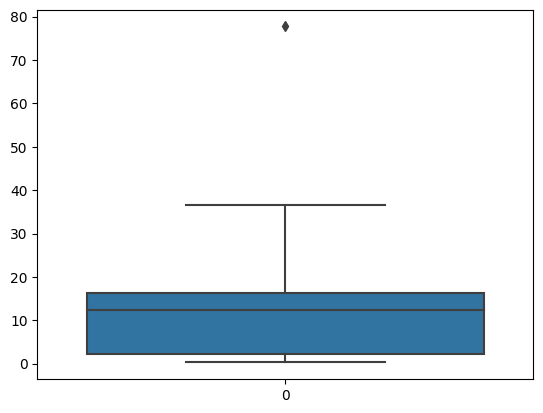

In [24]:
sns.boxplot(mutual.sd)

In [25]:
mutual[(mutual.sd>30)]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
89,Bank of India Credit Risk Fund,0,5000,1.54,161.0,8,Alok Singh,0.91,-13.360,77.72,-31.86,0.38,4,Bank of India Mutual Fund,5,Debt,Credit Risk Funds,130.8,12.8,-4.1
177,DSP World Gold Fund,500,500,1.81,777.0,10,Jay Kothari,1.11,1.855,36.51,0.86,0.40,6,DSP Mutual Fund,0,Other,FoFs Overseas,-9.0,14.8,10.2


In [26]:
mutual=mutual[(mutual.sd<30)]

<Axes: >

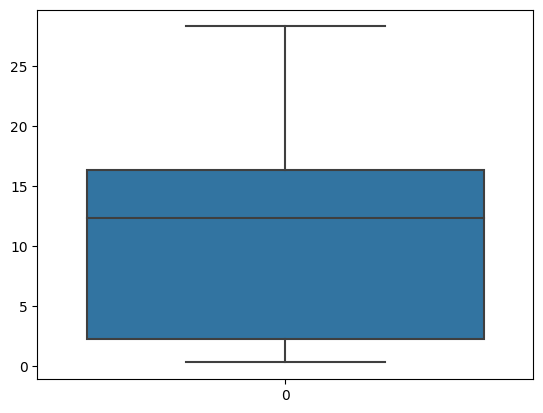

In [27]:
sns.boxplot(mutual.sd)

In [28]:
# first i have removed outlier and i filled the data 
mutual['sd']=mutual['sd'].fillna(mutual['sd'].mean())

In [29]:
mutual.isna().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [30]:
mutual[mutual.returns_3yr.isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [31]:
 mutual=mutual.dropna(subset=['returns_3yr'])

In [32]:
mutual.isna().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [33]:
mutual.returns_5yr.isnull().sum()

0

In [34]:
mutual[mutual.returns_5yr.isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


# I am checking to the Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'min_sip'),
  Text(1, 0, 'min_lumpsum'),
  Text(2, 0, 'expense_ratio'),
  Text(3, 0, 'fund_size_cr'),
  Text(4, 0, 'fund_age_yr'),
  Text(5, 0, 'sortino'),
  Text(6, 0, 'alpha'),
  Text(7, 0, 'sd'),
  Text(8, 0, 'beta'),
  Text(9, 0, 'sharpe'),
  Text(10, 0, 'risk_level'),
  Text(11, 0, 'rating'),
  Text(12, 0, 'returns_1yr'),
  Text(13, 0, 'returns_3yr'),
  Text(14, 0, 'returns_5yr')])

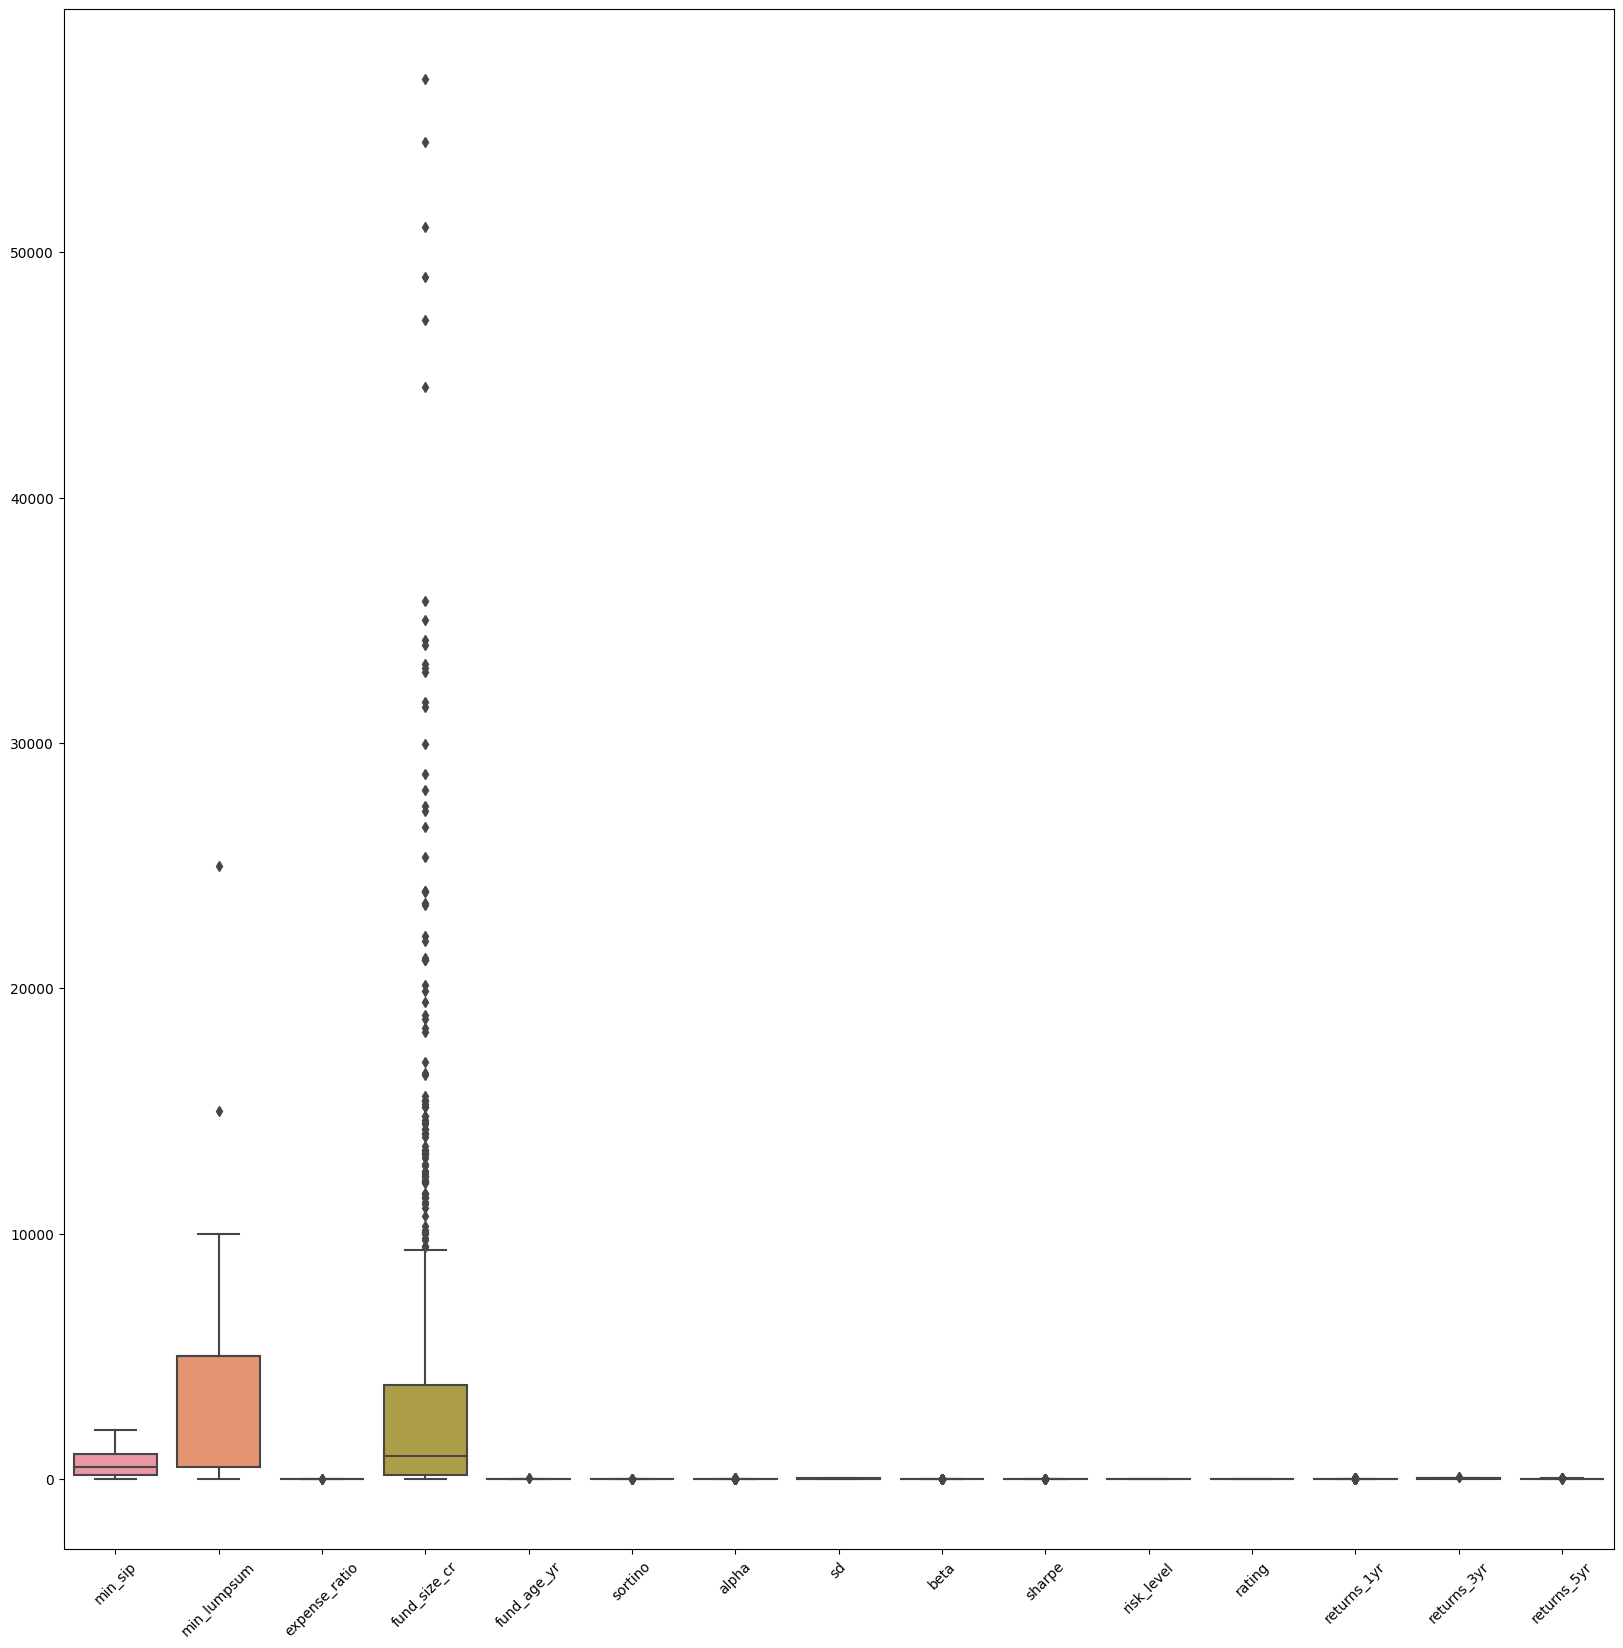

In [35]:
plt.figure(figsize=(20, 20))
sns.boxplot(mutual)
plt.xticks(rotation=45)

In [36]:
Q1 = mutual.fund_size_cr.quantile(0.25)
Q3 = mutual.fund_size_cr.quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR

3669.5

In [37]:
IQR = Q3 - Q1
IQR

3669.5

In [38]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5328.5, 9349.5)

In [39]:
mutual[(mutual.fund_size_cr<lower_limit)|(mutual.fund_size_cr>upper_limit)]


,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
8,Aditya Birla SL Corporate Bond Fund,100,100,0.31,12120.0,10,Kaustubh Gupta,2.28,2.38,1.93,0.78,1.35,2,Aditya Birla Sun Life Mutual Fund,4,Debt,Corporate Bond Mutual Funds,4.9,7.1,7.4
16,Aditya Birla SL Flexi Cap Fund,100,100,0.86,15449.0,10,Anil Shah,3.40,-1.46,16.60,0.96,1.27,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Flexi Cap Funds,-2.1,25.0,10.4
17,Aditya Birla SL Floating Rate Fund,1000,1000,0.23,12364.0,10,Kaustubh Gupta,2.81,3.73,1.14,1.37,1.66,2,Aditya Birla Sun Life Mutual Fund,5,Debt,Floater Mutual Funds,5.8,6.4,6.8
22,Aditya Birla SL Frontline Equity Fund,100,100,1.03,21131.0,10,Mahesh Patil,3.36,0.76,16.02,0.95,1.39,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Large Cap Mutual Funds,1.6,26.3,10.6
31,Aditya Birla SL Liquid Fund,500,500,0.21,28071.0,10,Kaustubh Gupta,5.28,1.49,0.39,0.80,1.06,3,Aditya Birla Sun Life Mutual Fund,4,Debt,Liquid Mutual Funds,5.7,4.4,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Tata Liquid Fund,150,5000,0.21,18212.0,10,Amit Somani,4.25,1.42,0.38,0.80,0.93,2,Tata Mutual Fund,3,Debt,Liquid Mutual Funds,5.6,4.4,5.3
785,UTI-Flexi Cap Fund,500,5000,0.90,23944.0,10,Ajay Tyagi,2.36,-2.88,17.47,0.97,1.14,6,UTI Mutual Fund,4,Equity,Flexi Cap Funds,-9.0,22.5,12.2
792,UTI-Liquid – Cash Plan – Direct Growth,0,500,0.14,31463.0,10,Amandeep Chopra,4.83,1.41,0.38,0.77,0.98,2,UTI Mutual Fund,4,Debt,Liquid Mutual Funds,5.7,4.4,5.3
794,UTI-Mastershare – Direct Growth,500,100,0.97,10312.0,10,Karthikraj Lakshmanan,3.28,-0.57,15.87,0.93,1.29,6,UTI Mutual Fund,4,Equity,Large Cap Mutual Funds,-2.0,24.2,11.5


In [40]:
mutual=mutual[(mutual.fund_size_cr>lower_limit)&(mutual.fund_size_cr<upper_limit)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'min_sip'),
  Text(1, 0, 'min_lumpsum'),
  Text(2, 0, 'expense_ratio'),
  Text(3, 0, 'fund_size_cr'),
  Text(4, 0, 'fund_age_yr'),
  Text(5, 0, 'sortino'),
  Text(6, 0, 'alpha'),
  Text(7, 0, 'sd'),
  Text(8, 0, 'beta'),
  Text(9, 0, 'sharpe'),
  Text(10, 0, 'risk_level'),
  Text(11, 0, 'rating'),
  Text(12, 0, 'returns_1yr'),
  Text(13, 0, 'returns_3yr'),
  Text(14, 0, 'returns_5yr')])

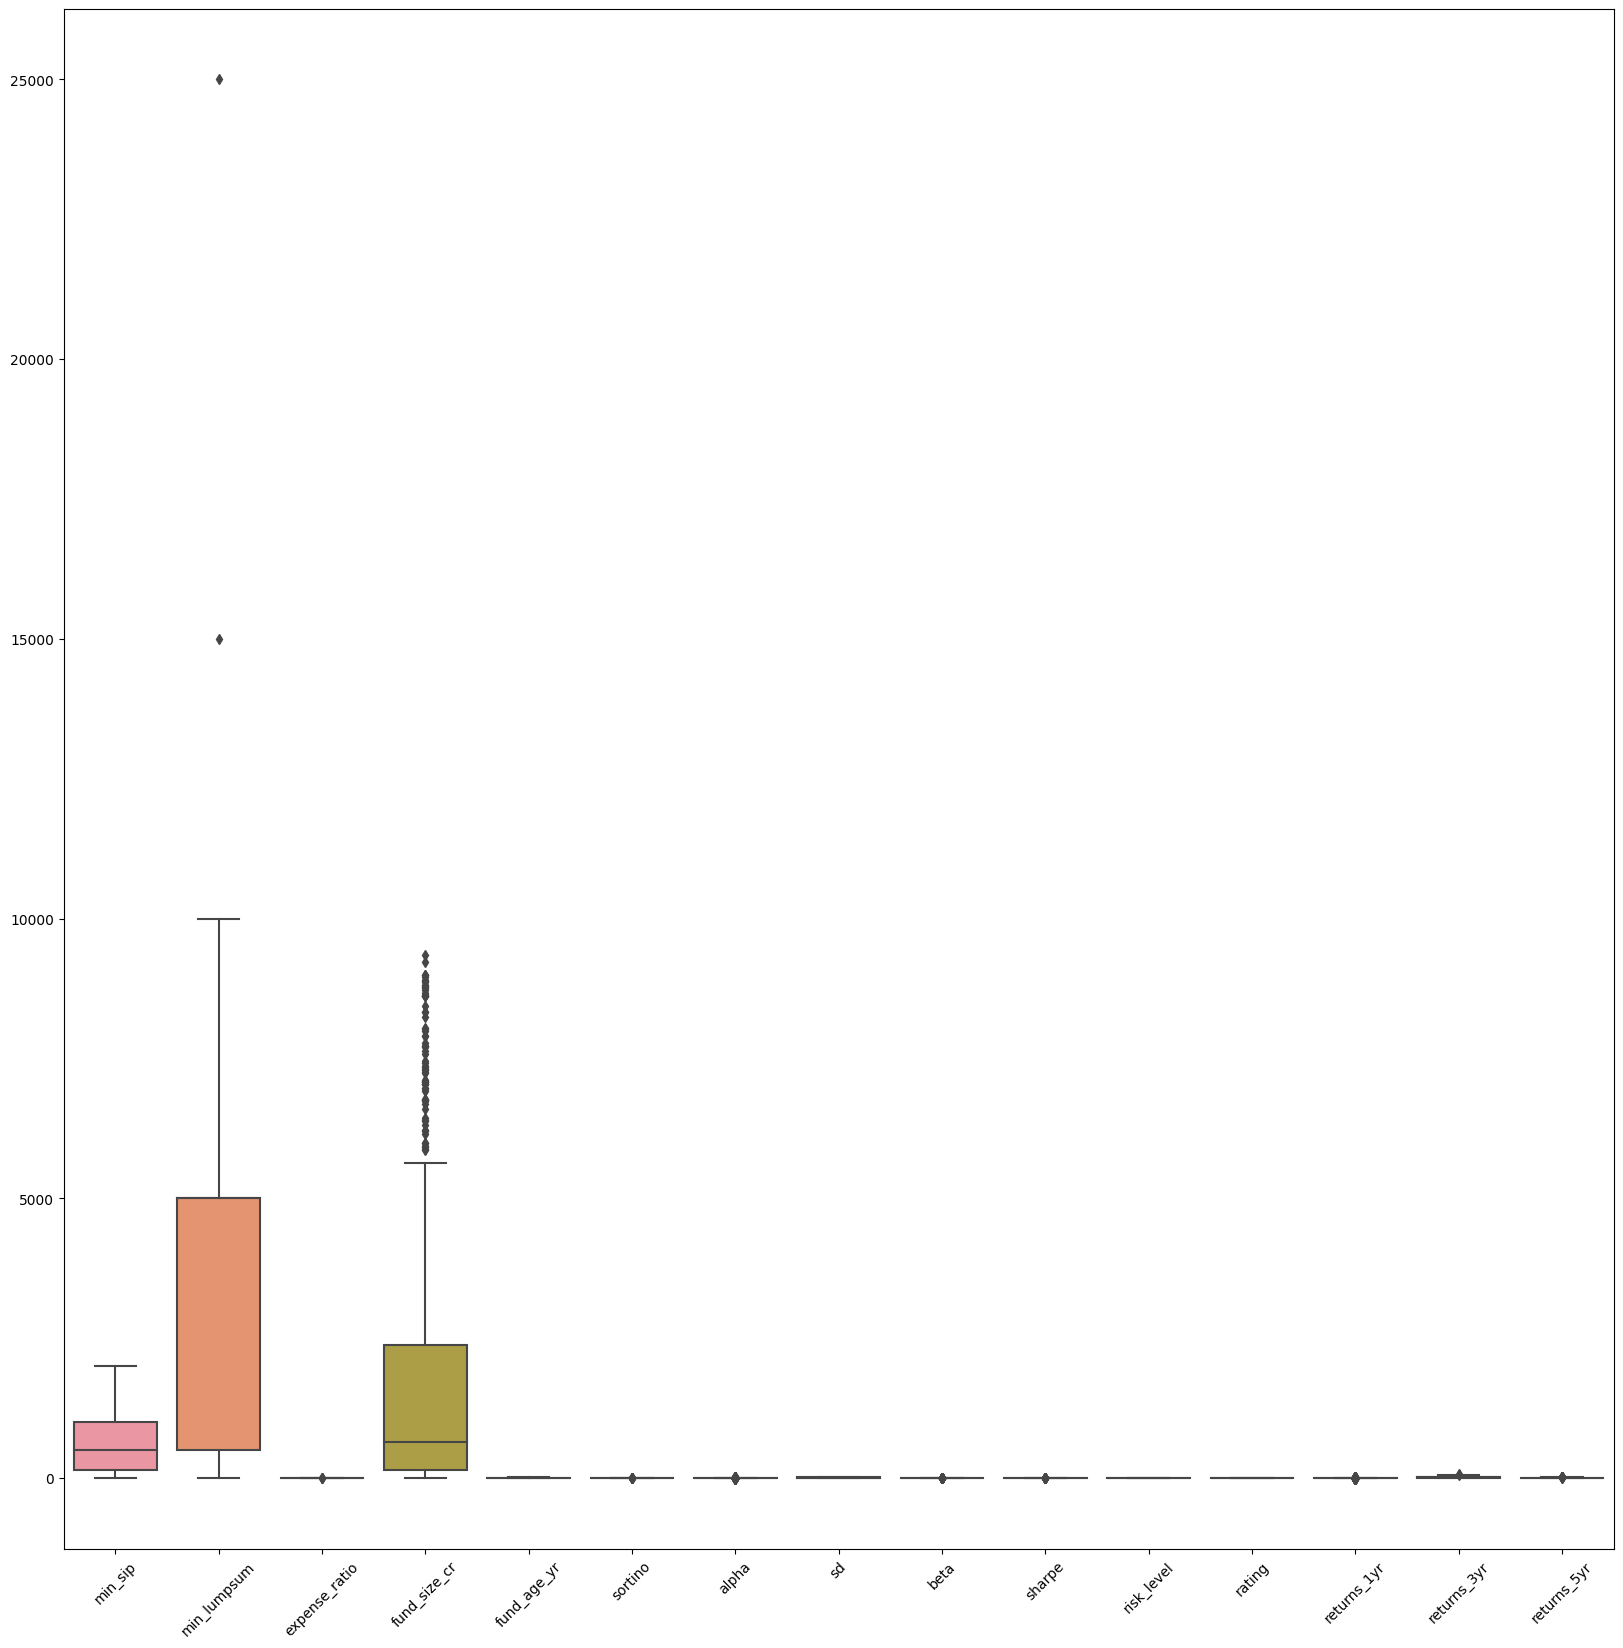

In [41]:
plt.figure(figsize=(20, 20))
sns.boxplot(mutual)
plt.xticks(rotation=45)

In [42]:
Q1 = mutual.min_lumpsum.quantile(0.25)
Q3 = mutual.min_lumpsum.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
mutual=mutual[(mutual.min_lumpsum>lower_limit)&(mutual.min_lumpsum<upper_limit)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'min_sip'),
  Text(1, 0, 'min_lumpsum'),
  Text(2, 0, 'expense_ratio'),
  Text(3, 0, 'fund_size_cr'),
  Text(4, 0, 'fund_age_yr'),
  Text(5, 0, 'sortino'),
  Text(6, 0, 'alpha'),
  Text(7, 0, 'sd'),
  Text(8, 0, 'beta'),
  Text(9, 0, 'sharpe'),
  Text(10, 0, 'risk_level'),
  Text(11, 0, 'rating'),
  Text(12, 0, 'returns_1yr'),
  Text(13, 0, 'returns_3yr'),
  Text(14, 0, 'returns_5yr')])

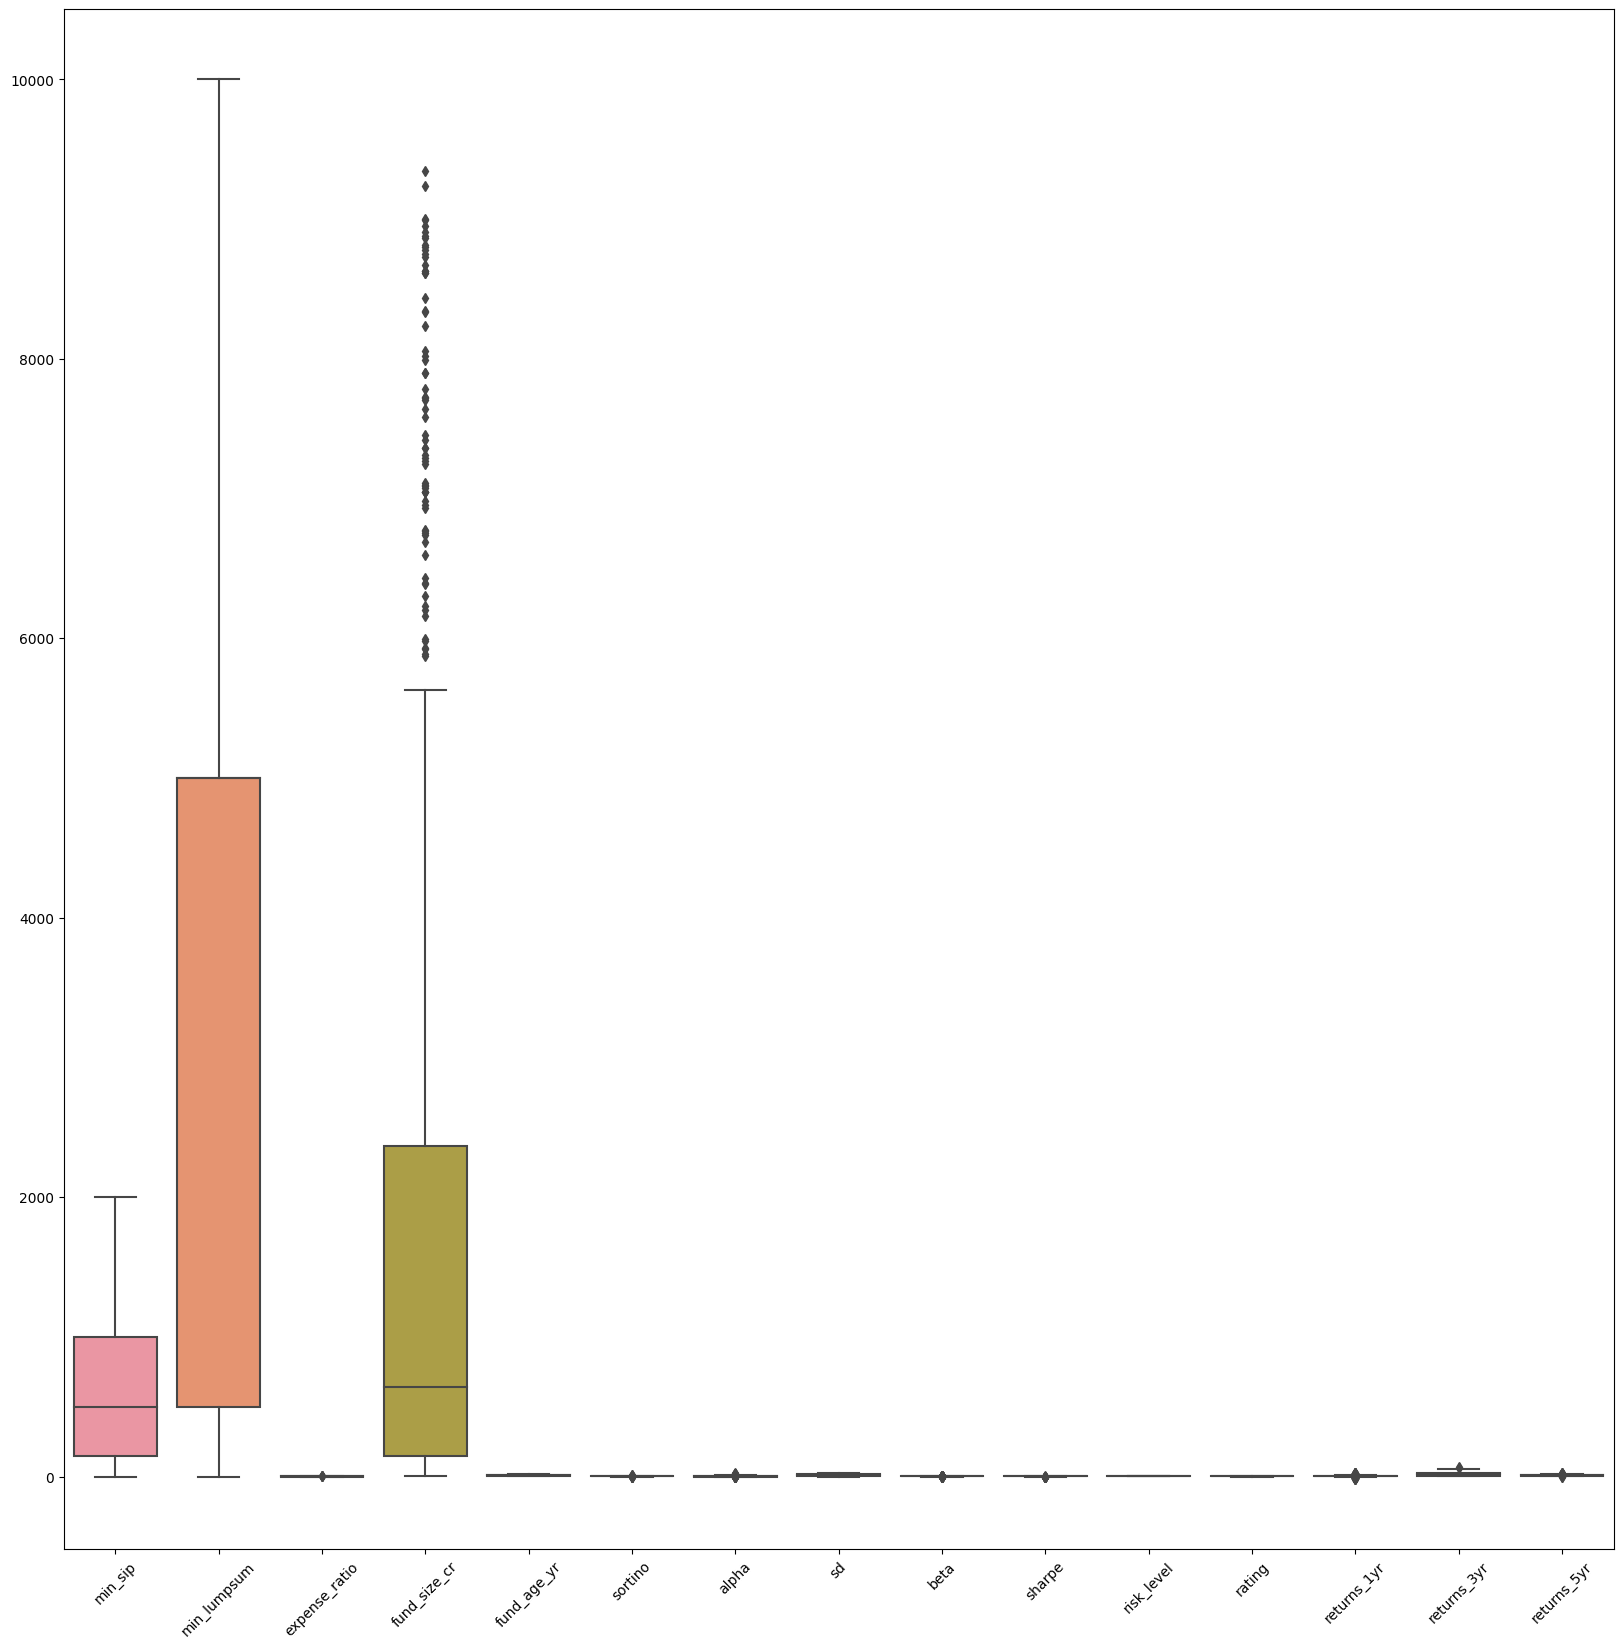

In [43]:
plt.figure(figsize=(20, 20))
sns.boxplot(mutual)
plt.xticks(rotation=45)

In [44]:
Q1 = mutual.fund_size_cr.quantile(0.25)
Q3 = mutual.fund_size_cr.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
mutual=mutual[(mutual.fund_size_cr>lower_limit)&(mutual.fund_size_cr<upper_limit)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'min_sip'),
  Text(1, 0, 'min_lumpsum'),
  Text(2, 0, 'expense_ratio'),
  Text(3, 0, 'fund_size_cr'),
  Text(4, 0, 'fund_age_yr'),
  Text(5, 0, 'sortino'),
  Text(6, 0, 'alpha'),
  Text(7, 0, 'sd'),
  Text(8, 0, 'beta'),
  Text(9, 0, 'sharpe'),
  Text(10, 0, 'risk_level'),
  Text(11, 0, 'rating'),
  Text(12, 0, 'returns_1yr'),
  Text(13, 0, 'returns_3yr'),
  Text(14, 0, 'returns_5yr')])

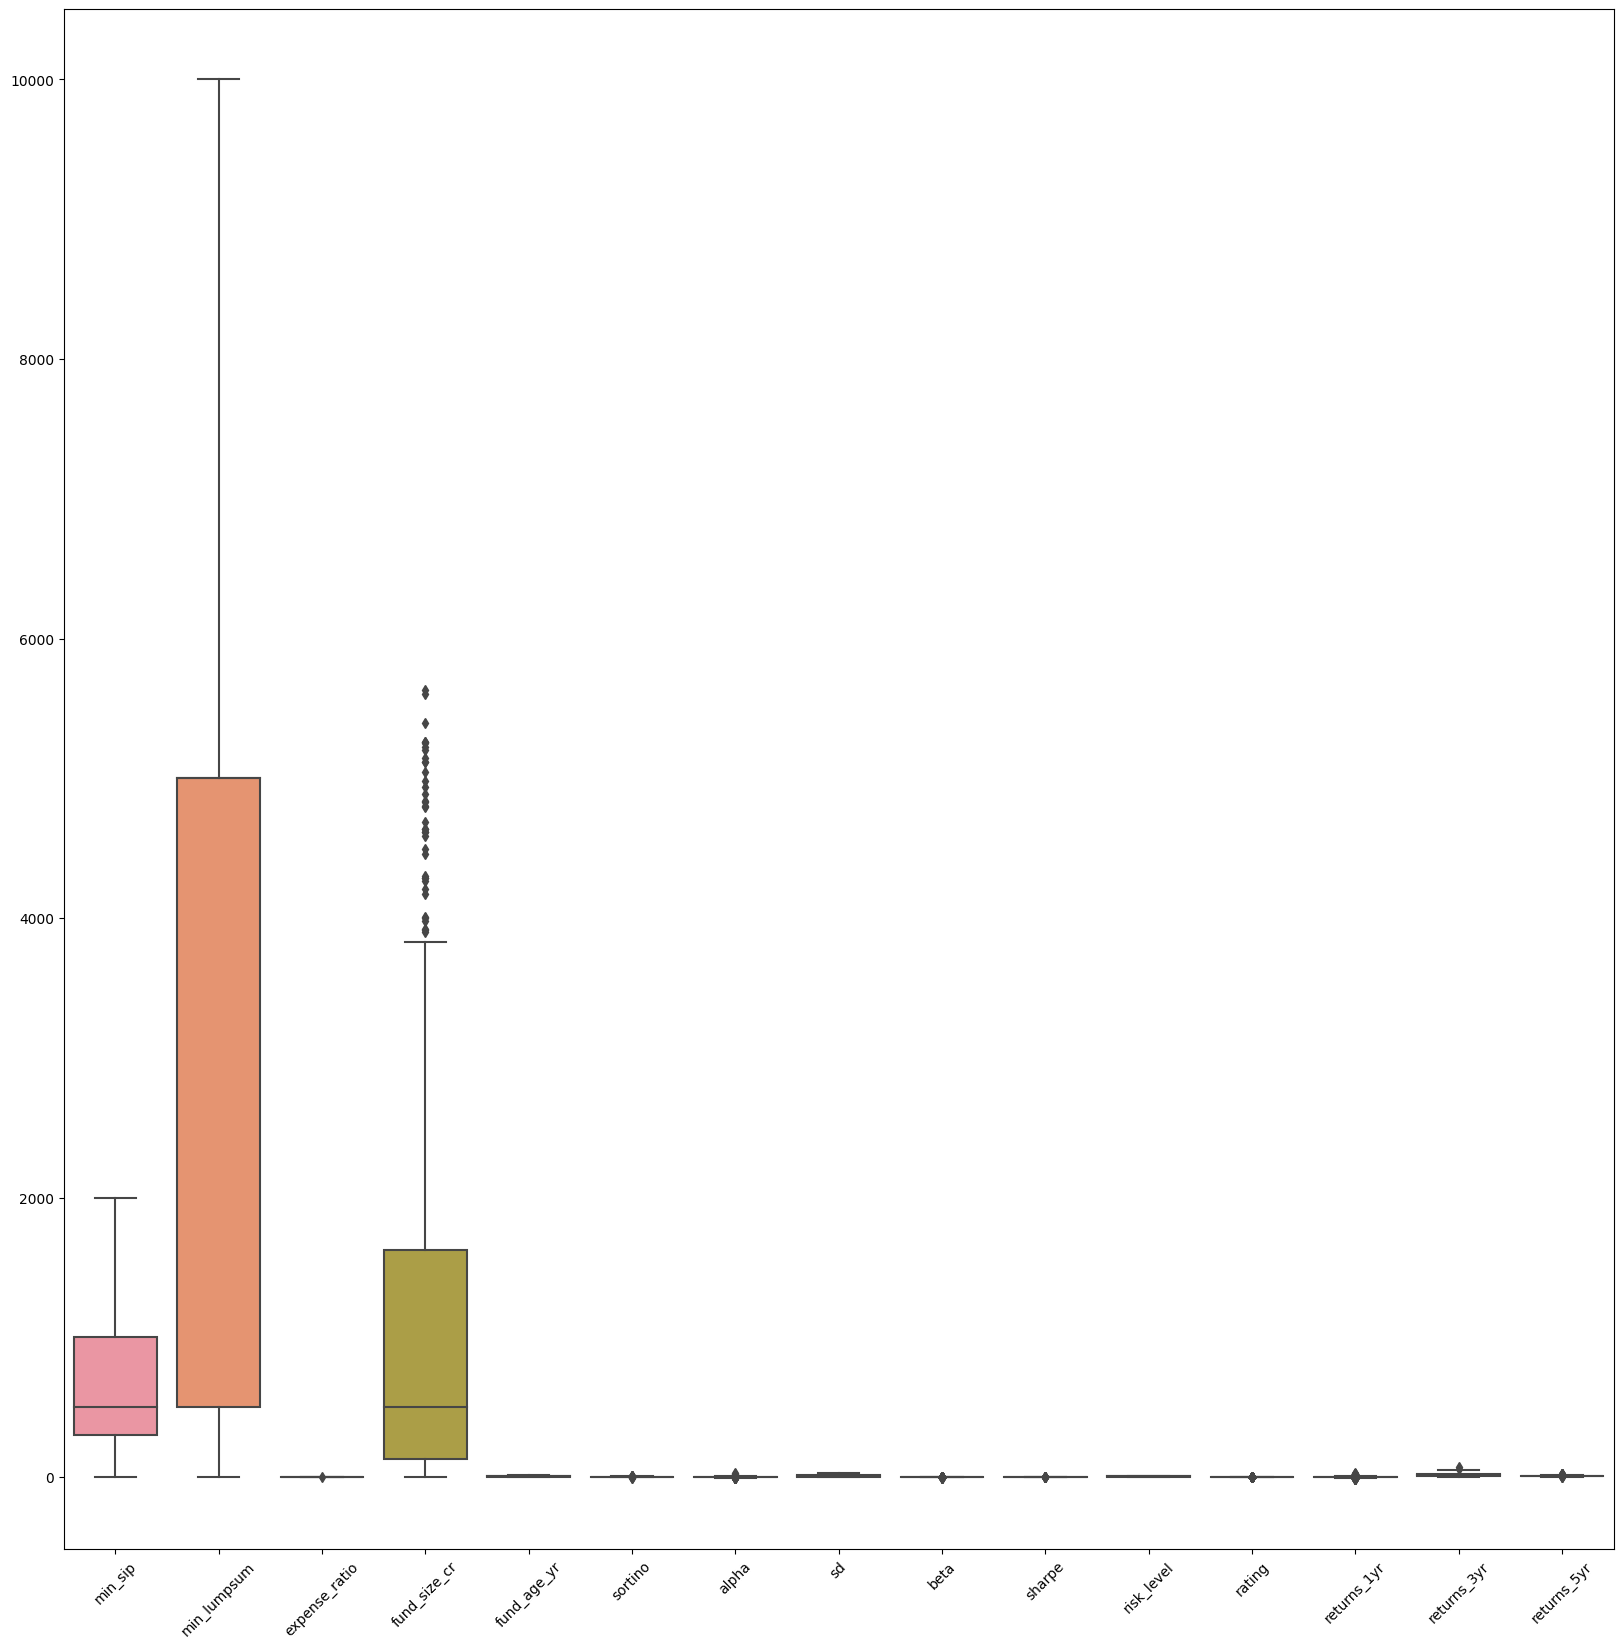

In [45]:
plt.figure(figsize=(20, 20))
sns.boxplot(mutual)
plt.xticks(rotation=45)

<Axes: >

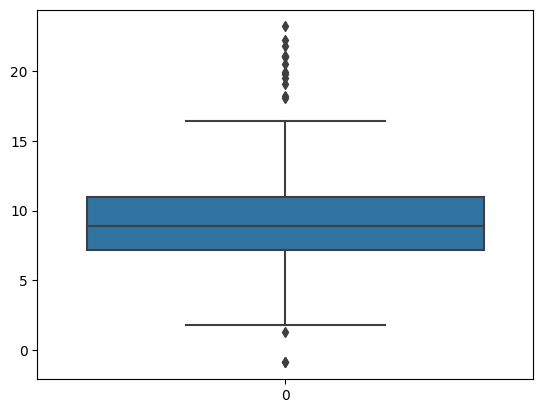

In [46]:
sns.boxplot(mutual.returns_5yr)

In [47]:
mutual['returns_5yr'] = mutual['returns_5yr'].fillna(mutual['returns_5yr'].mean())

In [48]:
mutual.isna().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [49]:
mutual.duplicated().sum()

0

In [50]:
mutual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    647 non-null    object 
 1   min_sip        647 non-null    int64  
 2   min_lumpsum    647 non-null    int64  
 3   expense_ratio  647 non-null    float64
 4   fund_size_cr   647 non-null    float64
 5   fund_age_yr    647 non-null    int64  
 6   fund_manager   647 non-null    object 
 7   sortino        647 non-null    float64
 8   alpha          647 non-null    float64
 9   sd             647 non-null    float64
 10  beta           647 non-null    float64
 11  sharpe         647 non-null    float64
 12  risk_level     647 non-null    int64  
 13  amc_name       647 non-null    object 
 14  rating         647 non-null    int64  
 15  category       647 non-null    object 
 16  sub_category   647 non-null    object 
 17  returns_1yr    647 non-null    float64
 18  returns_3y

# Categorical Features EDA

In [51]:
# why i mentioned on the data store is 64 because i saw the data info() then i got to know my data has only "int64 and float64"
cat_col = mutual.select_dtypes(exclude = ['int64','float64'])
print(cat_col.columns)

Index(['scheme_name', 'fund_manager', 'amc_name', 'category', 'sub_category'], dtype='object')


In [52]:
cat_col.head(2)

,scheme_name,fund_manager,amc_name,category,sub_category
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,Kaustubh Gupta,Aditya Birla Sun Life Mutual Fund,Other,FoFs Domestic
1,Aditya Birla SL Arbitrage Fund,Lovelish Solanki,Aditya Birla Sun Life Mutual Fund,Hybrid,Arbitrage Mutual Funds


In [53]:
cat_col['amc_name'].value_counts()

Sundaram Mutual Fund                 41
Aditya Birla Sun Life Mutual Fund    36
ICICI Prudential Mutual Fund         32
HSBC Mutual Fund                     30
SBI Mutual Fund                      29
Tata Mutual Fund                     29
UTI Mutual Fund                      29
DSP Mutual Fund                      27
Nippon India Mutual Fund             26
Invesco Mutual Fund                  25
Axis Mutual Fund                     24
Baroda BNP Paribas Mutual Fund       23
Franklin Templeton Mutual Fund       21
LIC Mutual Fund                      19
Edelweiss Mutual Fund                19
Kotak Mahindra Mutual Fund           19
HDFC Mutual Fund                     18
IDBI Mutual Fund                     18
Union Mutual Fund                    16
PGIM India Mutual Fund               16
Motilal Oswal Mutual Fund            15
Bank of India Mutual Fund            14
Canara Robeco Mutual Fund            14
Mahindra Manulife Mutual Fund        14
Mirae Asset Mutual Fund              11


In [54]:
cat_col['category'].value_counts()

Equity               235
Debt                 216
Hybrid                93
Other                 76
Solution Oriented     27
Name: category, dtype: int64

In [55]:
cat_col['fund_manager'].value_counts()

Rohit Seksaria        18
Alok Ranjan           11
Puneet Pal             9
Devang Shah            9
Vinod Narayan Bhat     8
                      ..
Ankit Jain             1
Harshad Borawake       1
Amit Modani            1
Mahendra Jajoo         1
Sailesh Raj Bhan       1
Name: fund_manager, Length: 239, dtype: int64

In [56]:
# We have catogory and amc_name column available hence we will be dropping sub_cat and scheme name colume from the dataframe
cat_col = cat_col.copy()
cat_col.drop(columns= ['sub_category','scheme_name'],inplace=True)

In [57]:
cat_col.head(1)

,fund_manager,amc_name,category
0,Kaustubh Gupta,Aditya Birla Sun Life Mutual Fund,Other


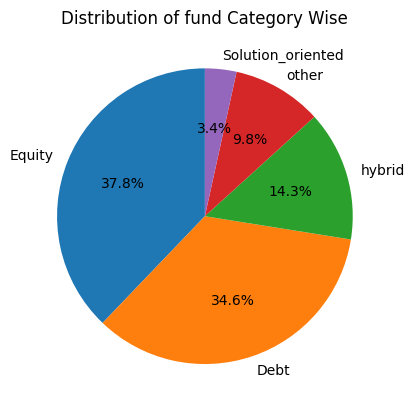

In [58]:
# Let plot Catogory Wise Fund Dstribution
values = [308,282,116,80,28]
plt.pie(values,labels=['Equity','Debt','hybrid','other','Solution_oriented'],autopct= '%1.1f%%',startangle = 90)
plt.title("Distribution of fund Category Wise")
plt.show()

# Numerical Features EDA

In [59]:
num_col = mutual.select_dtypes(exclude = ['object'])

In [60]:
num_col

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
0,100,100,0.27,10.0,10,0.32,2.24,9.39,0.01,0.24,3,3,4.0,6.5,6.9
1,1000,1000,0.36,4288.0,10,1.33,1.53,0.72,0.56,1.10,1,3,5.6,4.8,5.5
2,1000,1000,0.53,157.0,10,3.44,2.67,10.58,0.67,1.42,5,3,2.0,18.9,9.7
3,500,1000,0.76,637.0,4,2.18,-6.37,14.99,0.85,0.90,6,2,-0.7,17.1,8.9
5,1000,1000,1.17,2384.0,9,2.07,1.24,25.53,0.96,0.97,6,2,5.3,24.6,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,500,500,0.33,2565.0,10,6.28,3.18,2.63,0.14,1.14,2,5,5.2,7.3,4.8
808,500,500,0.44,2130.0,10,7.60,2.62,1.51,0.49,1.30,3,5,5.4,6.1,5.7
811,500,500,0.26,197.0,4,-0.42,0.93,0.39,0.72,-0.07,1,1,5.3,3.8,8.9
812,500,500,0.22,14.0,4,-0.42,0.93,0.39,0.72,-0.07,1,1,1.7,32.4,13.3


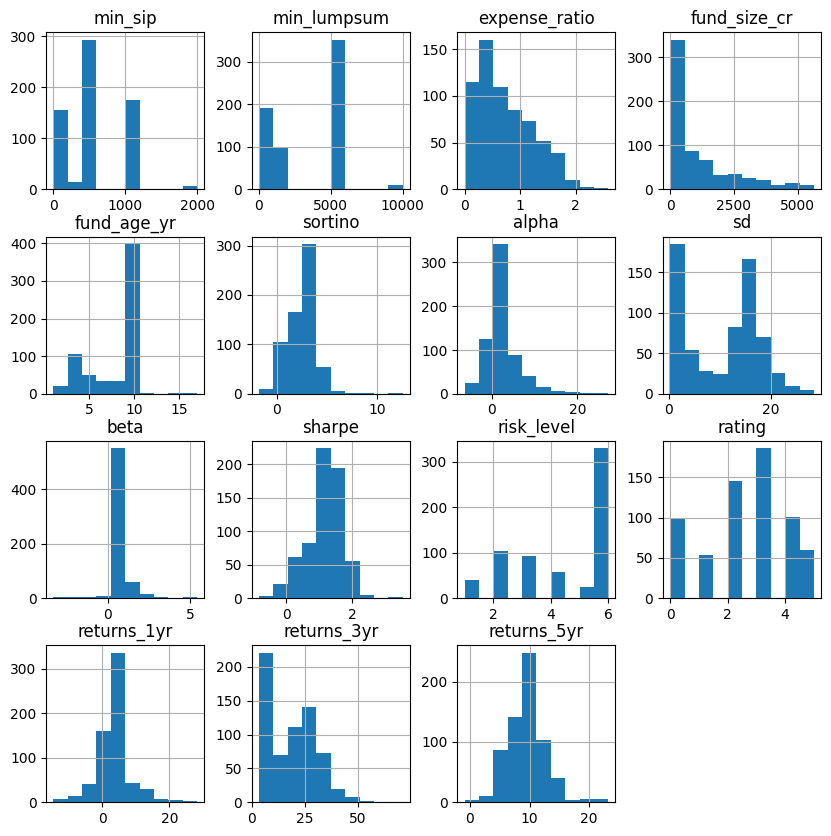

In [61]:
num_col.hist(bins=10,figsize=(10,10))
plt.show()

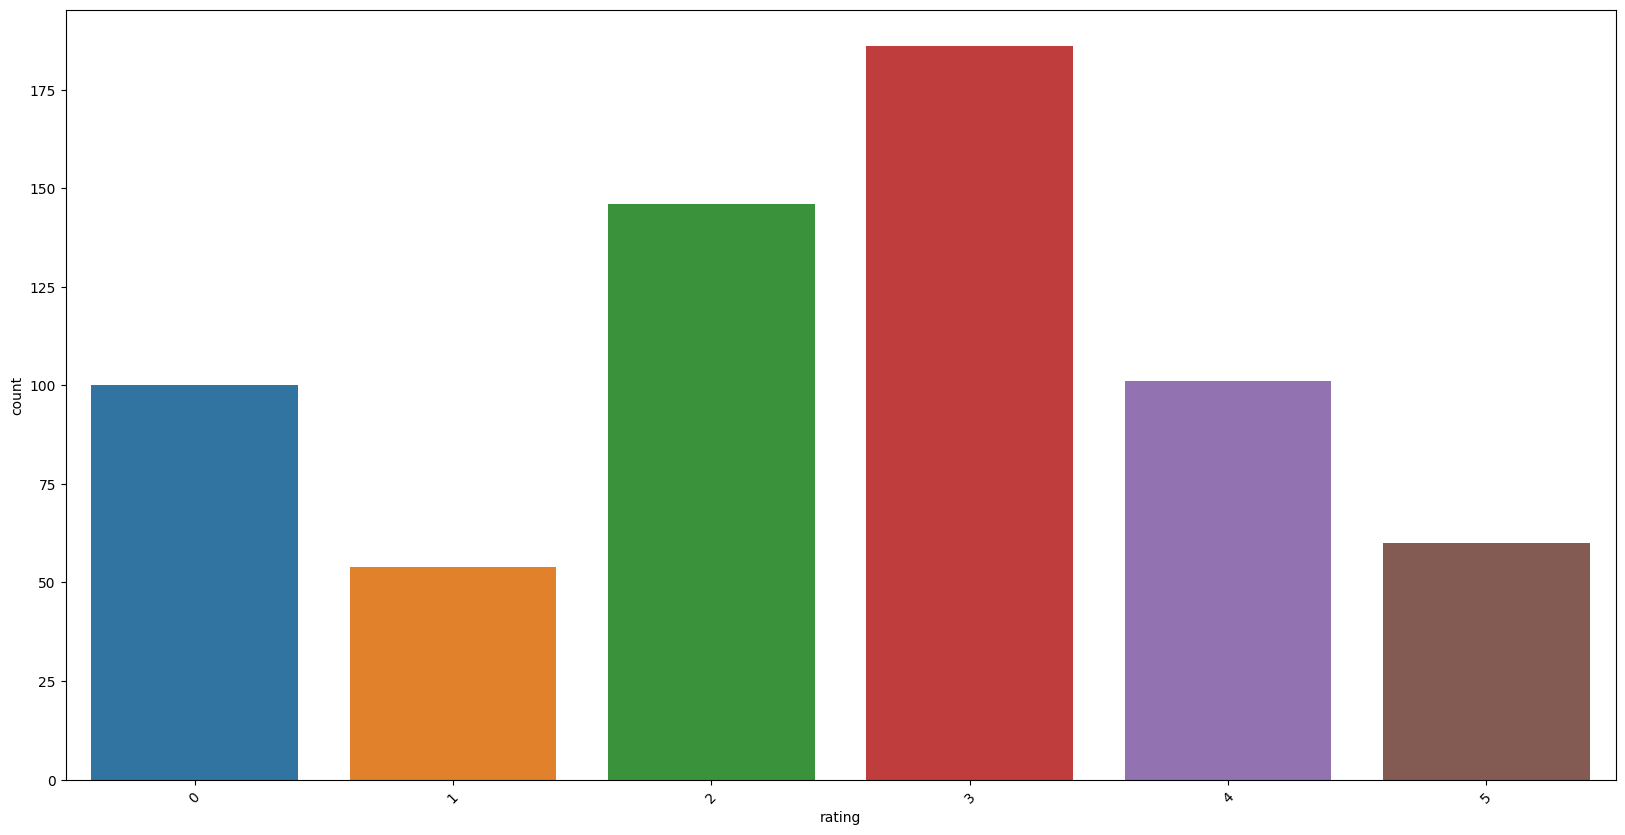

In [62]:
plt.figure(figsize=(20, 10))
sns.countplot(x ='rating', data = num_col)
plt.xticks(rotation=45)
plt.show()

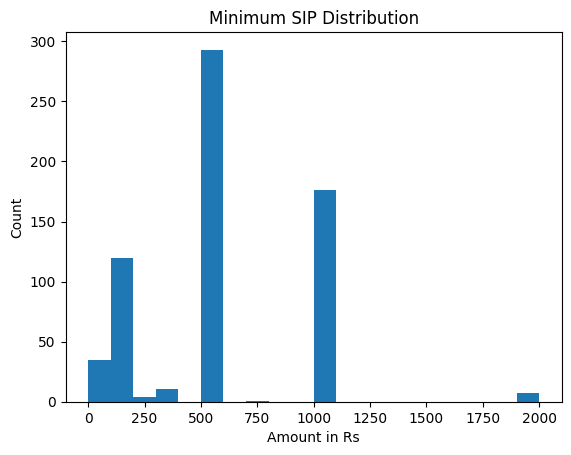

In [63]:
plt.hist(num_col['min_sip'],bins=20)
plt.title('Minimum SIP Distribution')
plt.xlabel("Amount in Rs")
plt.ylabel("Count")
plt.show()

In [64]:
mutual.head(1)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9


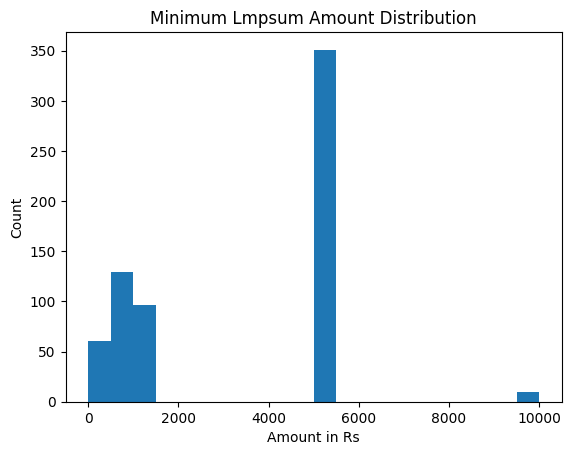

In [65]:
plt.hist(num_col['min_lumpsum'],bins=20)
plt.title('Minimum Lmpsum Amount Distribution')
plt.xlabel("Amount in Rs")
plt.ylabel("Count")
plt.show()

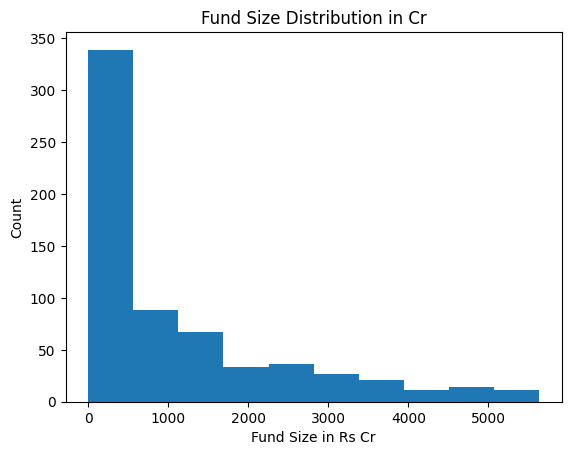

In [66]:
plt.hist(num_col['fund_size_cr'],bins=10)
plt.title("Fund Size Distribution in Cr")
plt.xlabel("Fund Size in Rs Cr")
plt.ylabel("Count")
plt.show()

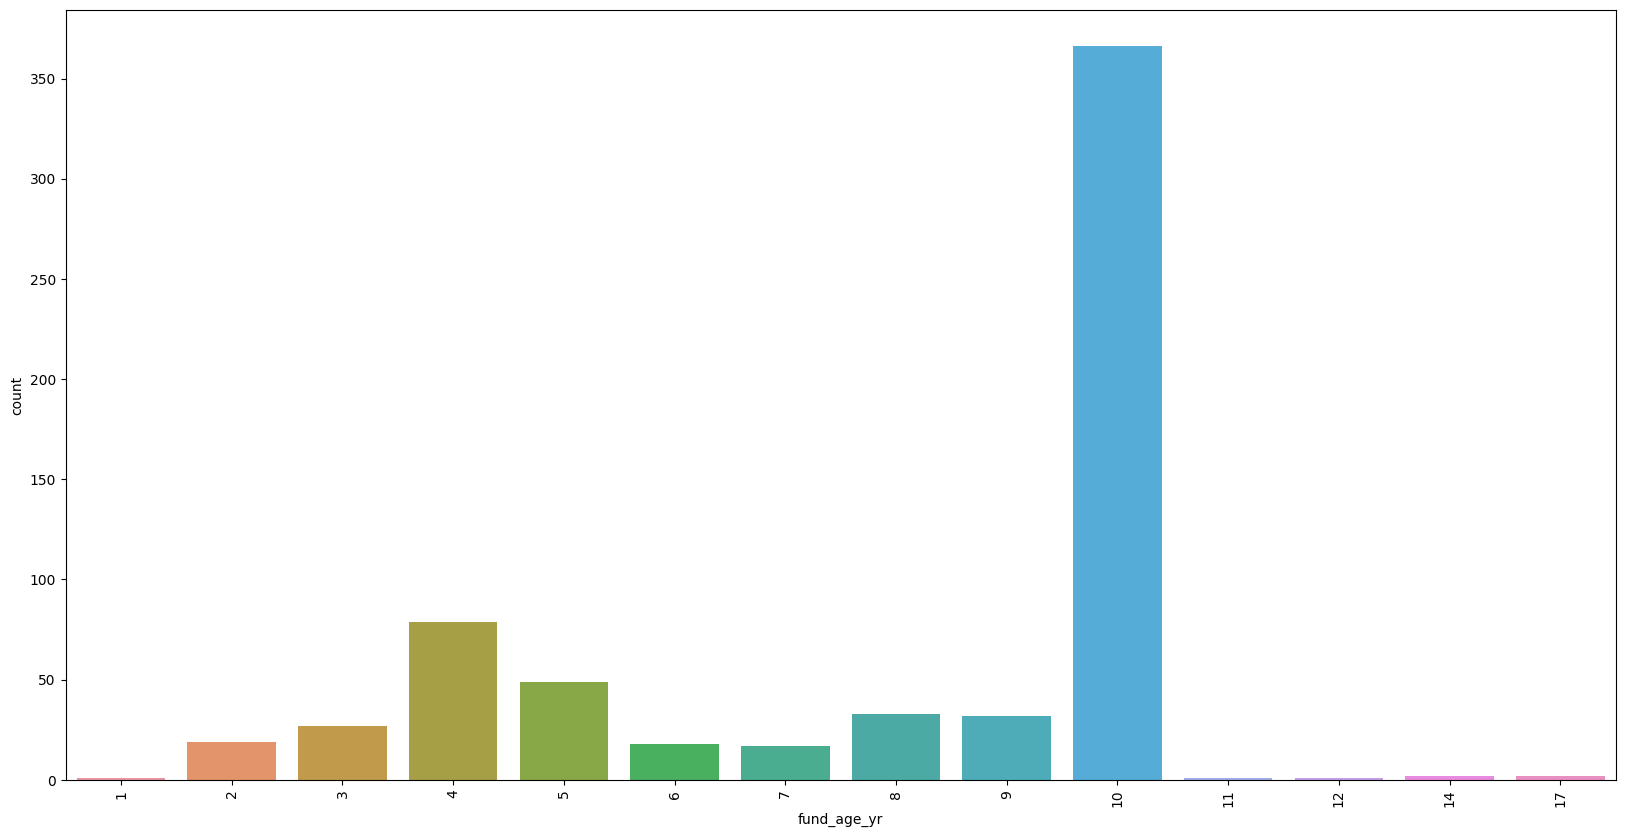

In [67]:
plt.figure(figsize=(20, 10))
sns.countplot(x ='fund_age_yr', data = num_col)
plt.xticks(rotation=90)
plt.show()

In [68]:
final_data = pd.concat([num_col,cat_col],axis=1, join='outer')

In [69]:
final_data.head(2)

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr,fund_manager,amc_name,category
0,100,100,0.27,10.0,10,0.32,2.24,9.39,0.01,0.24,3,3,4.0,6.5,6.9,Kaustubh Gupta,Aditya Birla Sun Life Mutual Fund,Other
1,1000,1000,0.36,4288.0,10,1.33,1.53,0.72,0.56,1.10,1,3,5.6,4.8,5.5,Lovelish Solanki,Aditya Birla Sun Life Mutual Fund,Hybrid


# Let's Find Highest Return Fund details of 1Year

In [70]:
max_return_1yr = final_data.loc[final_data['returns_1yr'].idxmax()]
max_return_1yr_prcnt = max_return_1yr[['returns_1yr','amc_name','category']]
max_return_1yr_prcnt

returns_1yr                         28.3
amc_name       Bank of India Mutual Fund
category                            Debt
Name: 97, dtype: object

# Let's Find Lowest Return Fund Details of 1Year

In [71]:
min_return_1yr = final_data.loc[final_data['returns_1yr'].idxmin()]
min_return_1yr_prcnt = min_return_1yr[['returns_1yr','amc_name','category']]
min_return_1yr_prcnt

returns_1yr                                -14.6
amc_name       Aditya Birla Sun Life Mutual Fund
category                                  Equity
Name: 10, dtype: object

# Let's Find Highest Return Fund details of 3Year

In [72]:
max_return_3yr = final_data.loc[final_data['returns_3yr'].idxmax()]
max_return_3yr_prcnt = max_return_3yr[['returns_3yr','amc_name','category']]
max_return_3yr_prcnt

returns_3yr                 71.4
amc_name       Quant Mutual Fund
category                  Equity
Name: 608, dtype: object

# Let's Find lowest Return Fund details of 3Year

In [73]:
min_return_3yr = final_data.loc[final_data['returns_3yr'].idxmin()]
min_return_3yr_prcnt = min_return_3yr[['returns_3yr','amc_name','category']]
min_return_3yr_prcnt


returns_3yr                       3.3
amc_name       Indiabulls Mutual Fund
category                       Hybrid
Name: 373, dtype: object

# Let's Find Highest Return Fund details of 5Year

In [74]:
max_return_5yr = final_data.loc[final_data['returns_5yr'].idxmax()]
max_return_5yr_prcnt = max_return_5yr[['returns_5yr','amc_name','category']]
max_return_5yr_prcnt

returns_5yr                 23.2
amc_name       Quant Mutual Fund
category                  Equity
Name: 608, dtype: object

# Let's Find lowest Return Fund details of 5Year

In [75]:
min_return_5yr = final_data.loc[final_data['returns_5yr'].idxmin()]
min_return_5yr_prcnt = min_return_5yr[['returns_5yr','amc_name','category']]
min_return_5yr_prcnt

returns_5yr                        -0.9
amc_name       Nippon India Mutual Fund
category                           Debt
Name: 572, dtype: object

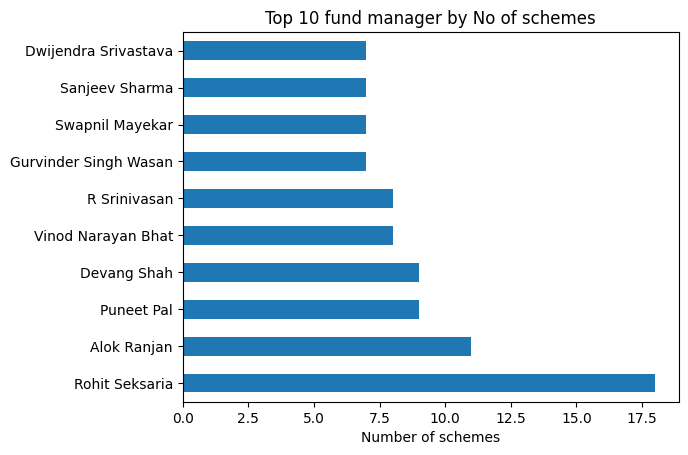

In [76]:
# top 10 fund manager by the number of schemes

mutual['fund_manager'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of schemes')
plt.title('Top 10 fund manager by No of schemes')
plt.show()

Top 10 fund manager by No of schemes.

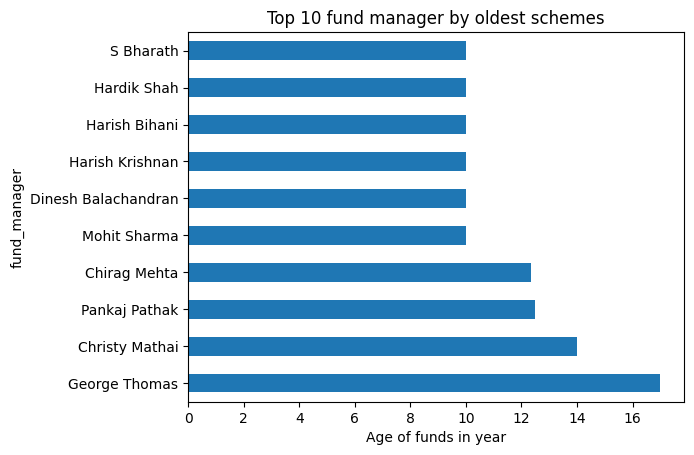

In [77]:
# top 10 fund manager by the mean age of funds
mutual.groupby(['fund_manager'])['fund_age_yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Age of funds in year')
plt.title('Top 10 fund manager by oldest schemes')
plt.show()


 **Rohit Seksaria is managing the highest number of Funds**

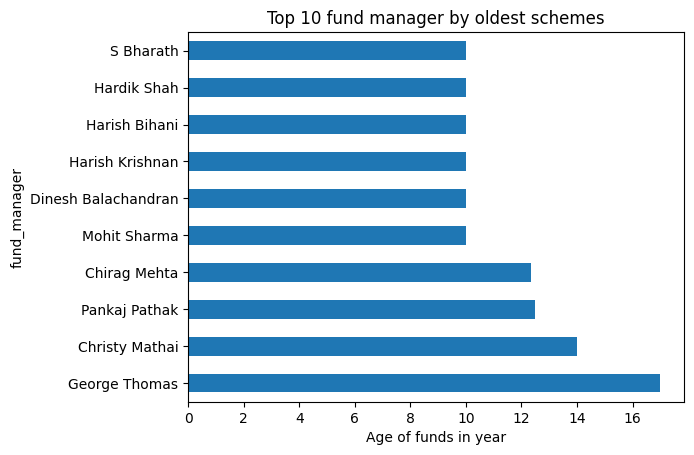

In [78]:
# top 10 fund manager by the mean age of funds
mutual.groupby(['fund_manager'])['fund_age_yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Age of funds in year')
plt.title('Top 10 fund manager by oldest schemes')
plt.show()

'George Thomas is managing a fund which is the oldest among our dataset.'

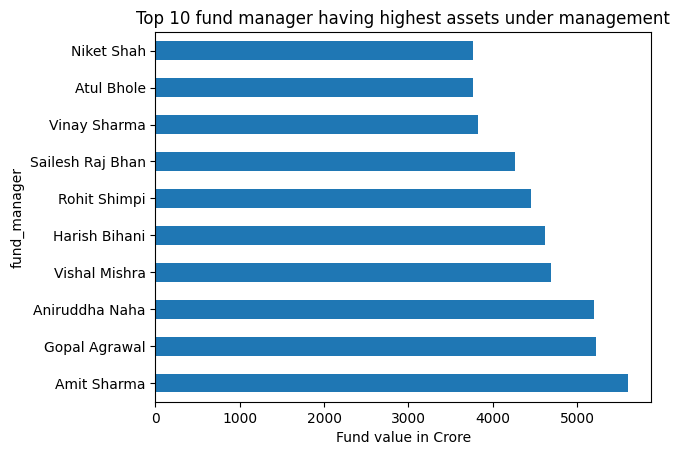

In [79]:
# top 10 fund manager by the assets under management
mutual.groupby(['fund_manager'])['fund_size_cr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Fund value in Crore')
plt.title('Top 10 fund manager having highest assets under management')
plt.show()

**Anupam Joshi has the highest AUM.**

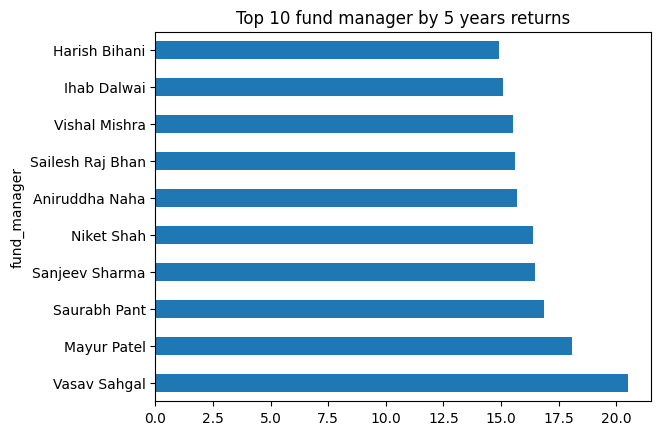

In [80]:
# fund manager with highest returns in 5 years

mutual.groupby(['fund_manager'])['returns_5yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')

plt.show()

'Vaibhav dusad has the highest returns in 5yrs'

## Analysis on min_sip and min_lumpsum

<Axes: >

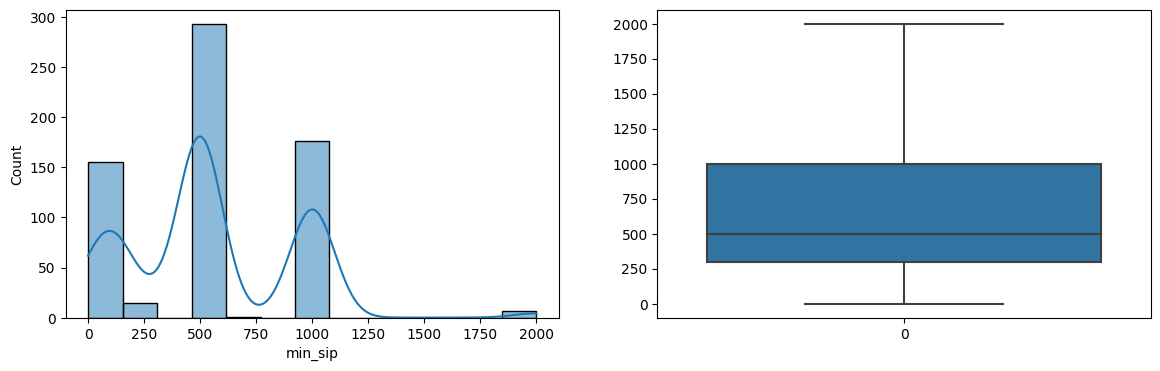

In [81]:
# distribution of min_sip
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(mutual['min_sip'],ax=ax[0],kde=True)
sns.boxplot(mutual['min_sip'],ax=ax[1])


("Most of the funds have Minimum SIP amount as 0,500 and 1000")

<Axes: >

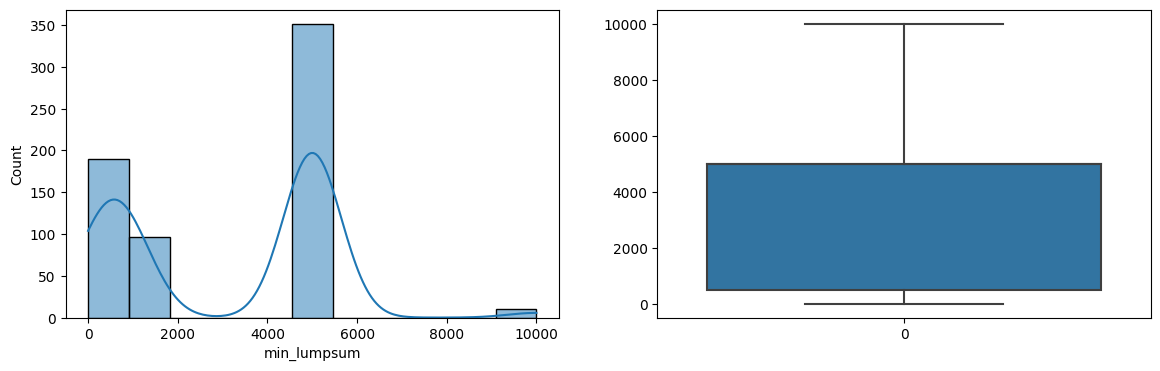

In [82]:
# distribution of min_lumpsum
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(mutual['min_lumpsum'],ax=ax[0],kde=True)
sns.boxplot(mutual['min_lumpsum'],ax=ax[1])

Most of the funds have Minimum Lumpsum amount between 0 to 5000.

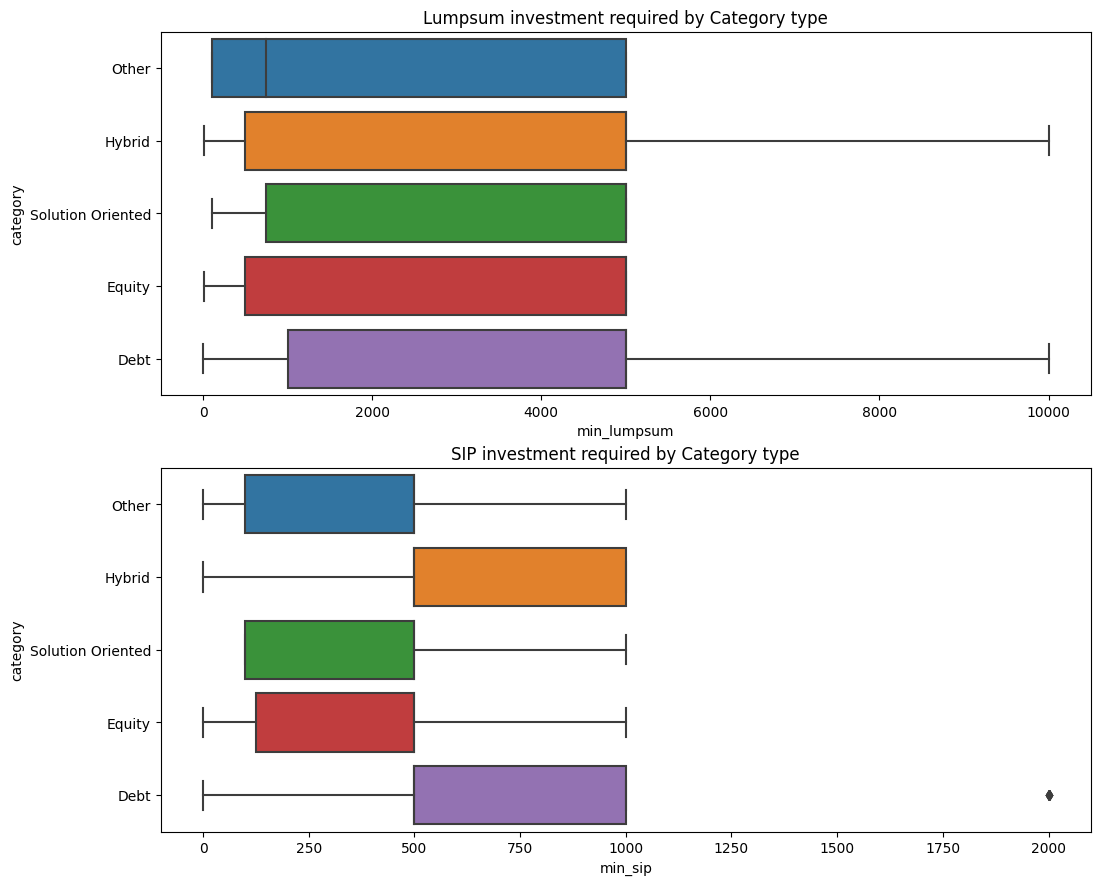

In [83]:
# distribution of min_sip and min_lumpsum by category type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.boxplot(data = mutual,y=mutual ['category'],x=mutual['min_lumpsum'],ax=axes[0])
sns.boxplot(data = mutual,y=mutual['category'],x=mutual['min_sip'],ax=axes[1])

axes[0].set_title('Lumpsum investment required by Category type')
axes[1].set_title('SIP investment required by Category type')
plt.subplots_adjust(bottom=4,top=5)
plt.show()

Across fund type lumpum investment is almost same.
Across fund type sip investment is high among Hybrid and Debt funds.

<Axes: >

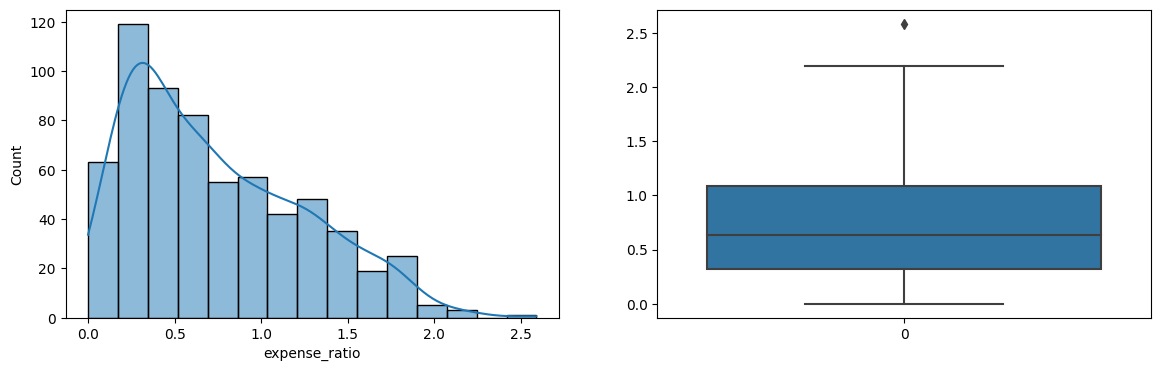

In [84]:
# expense ratio distribution
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(mutual['expense_ratio'],ax=ax[0],kde=True)
sns.boxplot(mutual['expense_ratio'],ax=ax[1])

In [85]:
# Lets find why very high risk fund has high expense ratio
pd.crosstab(mutual['risk_level'],mutual['category'],margins=True)

category,Debt,Equity,Hybrid,Other,Solution Oriented,All
risk_level,,,,,,
1,25,0,15,0,0,40
2,98,1,4,1,0,104
3,78,0,9,4,2,93
4,11,8,27,5,6,57
5,3,0,4,15,2,24
6,1,226,34,51,17,329
All,216,235,93,76,27,647


Clearly 0 rating fund has more equity category=72% and equity fund has high expense ratio.

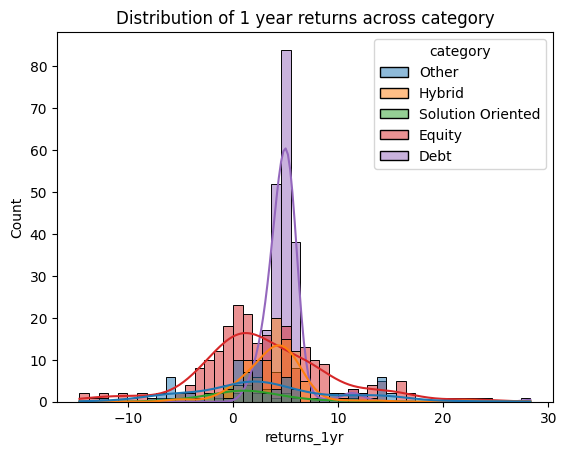

In [86]:
sns.histplot(mutual[mutual['returns_1yr']<30],x='returns_1yr',hue='category',kde=True)
plt.title('Distribution of 1 year returns across category')
plt.show()

For 1 year investment Debt fund has performed well. Other category may give negative returns as well.

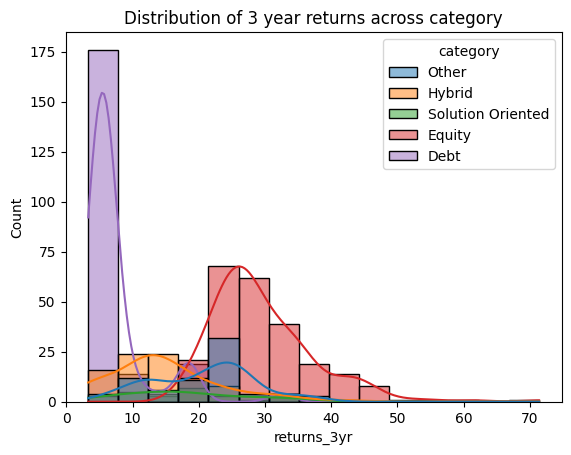

In [87]:
sns.histplot(mutual,x='returns_3yr',hue='category',kde=True)
plt.title('Distribution of 3 year returns across category')
plt.show()

Equity has outperformed every other category for 3 years performance.

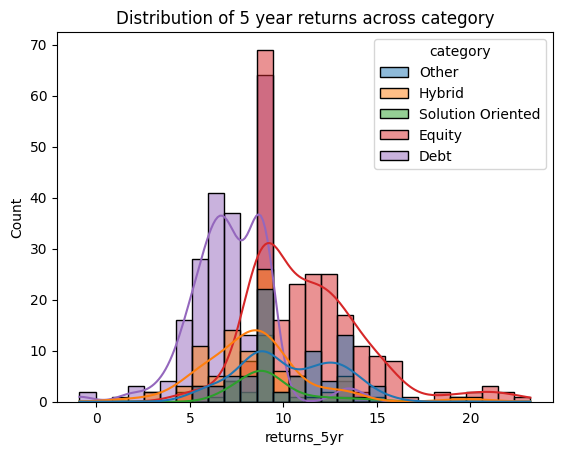

In [88]:
sns.histplot(mutual,x='returns_5yr',hue='category',kde=True)
plt.title('Distribution of 5 year returns across category')
plt.show()

Equity has outperformed every other category for 5 years performance.

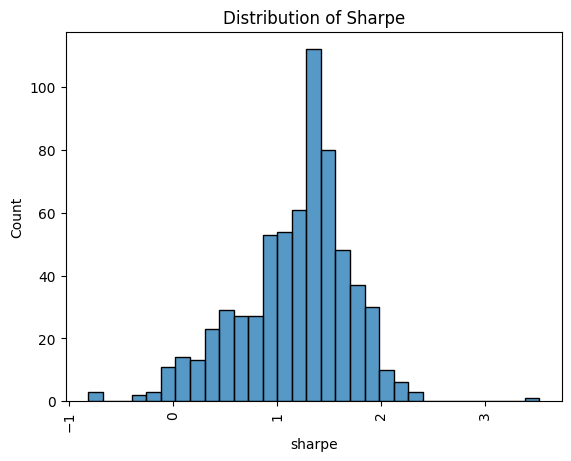

In [89]:
mutual['sharpe'].value_counts().nlargest(10)
sns.histplot(mutual['sharpe'])
plt.title('Distribution of Sharpe')
plt.xticks(rotation=90)
plt.show()

1) The fund management landscape is led by Rohit Seksaria, overseeing the highest number of schemes among fund managers.
2) The oldest fund within the dataset is managed by George Thomas.
3) Anupam Joshi commands the highest Assets Under Management (AUM) across the funds.
4) Vaibhav Dusad's funds demonstrate the most impressive returns over a 5-year period.
5) Majority of the funds offer Minimum Systematic Investment Plan (SIP) amounts at 0, 500, and 1000.
6) Fund investments show a prevalent range of Minimum Lumpsum amounts, mainly falling between 0 to 5000.
7) Lumpsum investments remain relatively consistent across various fund types.
8) Hybrid and Debt funds stand out for higher SIP investments compared to other fund types.
9) Funds with a rating of 0 correlate with a substantial 72% being in the equity category, where equity funds also exhibit elevated expense ratios.
10) Debt funds showcase strong performance for 1-year investments, whereas other categories may yield negative returns.
11) Over a 3-year period, equity funds consistently outperform other categories, demonstrating superior performance.
12) The dominance of equity funds in outperforming other categories is further evident in their 5-year performance.

# Feature engineering.

In [90]:
mutual.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,8.9
5,Aditya Birla SL Banking&Financial Services-Dir...,1000,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.24,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,5.3,24.6,9.2


In [91]:
mutual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    647 non-null    object 
 1   min_sip        647 non-null    int64  
 2   min_lumpsum    647 non-null    int64  
 3   expense_ratio  647 non-null    float64
 4   fund_size_cr   647 non-null    float64
 5   fund_age_yr    647 non-null    int64  
 6   fund_manager   647 non-null    object 
 7   sortino        647 non-null    float64
 8   alpha          647 non-null    float64
 9   sd             647 non-null    float64
 10  beta           647 non-null    float64
 11  sharpe         647 non-null    float64
 12  risk_level     647 non-null    int64  
 13  amc_name       647 non-null    object 
 14  rating         647 non-null    int64  
 15  category       647 non-null    object 
 16  sub_category   647 non-null    object 
 17  returns_1yr    647 non-null    float64
 18  returns_3y

In [92]:
mutual.amc_name.unique()

array(['Aditya Birla Sun Life Mutual Fund', 'Axis Mutual Fund',
       'Bandhan Mutual Fund', 'Bank of India Mutual Fund',
       'Baroda BNP Paribas Mutual Fund', 'Edelweiss Mutual Fund',
       'Canara Robeco Mutual Fund', 'DSP Mutual Fund',
       'Franklin Templeton Mutual Fund', 'HDFC Mutual Fund',
       'HSBC Mutual Fund', 'ICICI Prudential Mutual Fund',
       'IDBI Mutual Fund', 'IIFL Mutual Fund', 'Indiabulls Mutual Fund',
       'Invesco Mutual Fund', 'ITI Mutual Fund',
       'JM Financial Mutual Fund', 'Kotak Mahindra Mutual Fund',
       'L&T Mutual Fund', 'LIC Mutual Fund',
       'Mahindra Manulife Mutual Fund', 'Mirae Asset Mutual Fund',
       'Motilal Oswal Mutual Fund', 'Navi Mutual Fund',
       'Nippon India Mutual Fund', 'PPFAS Mutual Fund',
       'PGIM India Mutual Fund', 'Quant Mutual Fund',
       'Quantum Mutual Fund', 'SBI Mutual Fund', 'Shriram Mutual Fund',
       'Sundaram Mutual Fund', 'Tata Mutual Fund', 'Taurus Mutual Fund',
       'Trust Mutual Fund'

In [93]:
mutual.replace({'Aditya Birla Sun Life Mutual Fund':0,'Bandhan Mutual Fund':6,'Axis Mutual Fund':2,'Bank of India Mutual Fund':3,'Baroda BNP Paribas Mutual Fund':4,'Canara Robeco Mutual Fund':5,'DSP Mutual Fund ':7, 'Edelweiss Mutual Fund':8, 'Franklin Templeton Mutual Fund':9,
              'HDFC Mutual Fund':10, 'HSBC Mutual Fund':11, 'ICICI Prudential Mutual Fund':12,'IDBI Mutual Fund':13, 'IIFL Mutual Fund':14, 'Indiabulls Mutual Fund':15,
              'Invesco Mutual Fund':16, 'JM Financial Mutual Fund':17, 'Kotak Mahindra Mutual Fund':18, 'L&T Mutual Fund':19, 'LIC Mutual Fund':20,'Mahindra Manulife Mutual Fund':21 ,'Mirae Asset Mutual Fund':22,
              'Motilal Oswal Mutual Fund':23, 'Navi Mutual Fund':24, 'Nippon India Mutual Fund':25,'PGIM India Mutual Fund':26, 'Quant Mutual Fund':27, 'Quantum Mutual Fund':28, 'SBI Mutual Fund':29,
              'Shriram Mutual Fund':30, 'Sundaram Mutual Fund':31, 'UTI Mutual Fund':32, 'WhiteOak Capital Mutual Fund':33,'DSP Mutual Fund':34 ,'Tata Mutual Fund':35,'Taurus Mutual Fund':36,'Union Mutual Fund':37,'ITI Mutual Fund':38,'PPFAS Mutual Fund':39,'Trust Mutual Fund':40},inplace=True)

In [94]:
mutual.amc_name.unique()

array([ 0,  2,  6,  3,  4,  8,  5, 34,  9, 10, 11, 12, 13, 14, 15, 16, 38,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 39, 26, 27, 28, 29, 30, 31, 35,
       36, 40, 37, 32, 33], dtype=int64)

In [95]:
mutual.category.unique()

array(['Other', 'Hybrid', 'Solution Oriented', 'Equity', 'Debt'],
      dtype=object)

In [96]:
mutual.replace({'Other':0,'Hybrid':1,'Equity':2,'Debt':3,'Solution Oriented':4},inplace=True)

**unuse columns are droping from the dataset**

In [97]:
mutual.drop(['scheme_name','fund_manager','sub_category'],axis=1,inplace=True)

In [98]:
mutual.head()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,returns_1yr,returns_3yr,returns_5yr
0,100,100,0.27,10.0,10,0.32,2.24,9.39,0.01,0.24,3,0,3,0,4.0,6.5,6.9
1,1000,1000,0.36,4288.0,10,1.33,1.53,0.72,0.56,1.10,1,0,3,1,5.6,4.8,5.5
2,1000,1000,0.53,157.0,10,3.44,2.67,10.58,0.67,1.42,5,0,3,0,2.0,18.9,9.7
3,500,1000,0.76,637.0,4,2.18,-6.37,14.99,0.85,0.90,6,0,2,4,-0.7,17.1,8.9
5,1000,1000,1.17,2384.0,9,2.07,1.24,25.53,0.96,0.97,6,0,2,2,5.3,24.6,9.2


In [99]:
mutual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 813
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_sip        647 non-null    int64  
 1   min_lumpsum    647 non-null    int64  
 2   expense_ratio  647 non-null    float64
 3   fund_size_cr   647 non-null    float64
 4   fund_age_yr    647 non-null    int64  
 5   sortino        647 non-null    float64
 6   alpha          647 non-null    float64
 7   sd             647 non-null    float64
 8   beta           647 non-null    float64
 9   sharpe         647 non-null    float64
 10  risk_level     647 non-null    int64  
 11  amc_name       647 non-null    int64  
 12  rating         647 non-null    int64  
 13  category       647 non-null    int64  
 14  returns_1yr    647 non-null    float64
 15  returns_3yr    647 non-null    float64
 16  returns_5yr    647 non-null    float64
dtypes: float64(10), int64(7)
memory usage: 107.1 KB


# Now i will be backuping the data

In [100]:
data_backup = mutual.copy(deep=True)

# Split the dataframe into x & y

In [101]:
# the people are looking for mutual funds based on returns and most of the people are looking for long term returns
                                                       #that's why i have taken "returns_5yr" column
# Separate object for target feature 
y= mutual['returns_5yr']

# Separate object for Predictors 
X = mutual.drop('returns_5yr',axis=1)

In [102]:
y.head()

0    6.9
1    5.5
2    9.7
3    8.9
5    9.2
Name: returns_5yr, dtype: float64

In [103]:
X.head()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,returns_1yr,returns_3yr
0,100,100,0.27,10.0,10,0.32,2.24,9.39,0.01,0.24,3,0,3,0,4.0,6.5
1,1000,1000,0.36,4288.0,10,1.33,1.53,0.72,0.56,1.10,1,0,3,1,5.6,4.8
2,1000,1000,0.53,157.0,10,3.44,2.67,10.58,0.67,1.42,5,0,3,0,2.0,18.9
3,500,1000,0.76,637.0,4,2.18,-6.37,14.99,0.85,0.90,6,0,2,4,-0.7,17.1
5,1000,1000,1.17,2384.0,9,2.07,1.24,25.53,0.96,0.97,6,0,2,2,5.3,24.6


In [104]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (647, 16), Dependent Features Shape = (647,)


In [105]:
X.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,returns_1yr,returns_3yr
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,548.454405,3124.018547,0.740541,1107.682117,8.044822,2.539042,2.460966,10.451530,0.851716,1.163323,4.403400,19.321484,2.485317,2.038640,3.768315,18.556414
std,364.777498,2357.219709,0.505721,1334.923816,2.769722,1.382190,3.870418,7.148553,0.582516,0.530382,1.804583,11.601960,1.488662,1.055748,4.957073,11.769190
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-6.370000,0.270000,-3.290000,-0.820000,1.000000,0.000000,0.000000,0.000000,-14.600000,3.300000
25%,300.000000,500.000000,0.320000,132.500000,5.000000,1.680000,0.485000,2.675000,0.700000,0.890000,3.000000,10.000000,2.000000,1.000000,1.400000,6.400000
50%,500.000000,5000.000000,0.630000,501.000000,10.000000,2.790000,1.855000,12.300000,0.860000,1.280000,6.000000,20.000000,3.000000,2.000000,4.100000,18.500000
75%,1000.000000,5000.000000,1.085000,1628.500000,10.000000,3.385000,3.620000,16.310000,0.960000,1.510000,6.000000,31.000000,3.000000,3.000000,5.400000,26.550000
max,2000.000000,10000.000000,2.590000,5633.000000,17.000000,12.570000,27.240000,28.330000,5.400000,3.520000,6.000000,40.000000,5.000000,4.000000,28.300000,71.400000


# StandardScaler

In [106]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [107]:
X.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,returns_1yr,returns_3yr
count,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,6.470000e+02,647.000000,6.470000e+02
mean,-1.757138e-16,2.470976e-17,7.687479e-17,-1.523768e-16,1.619862e-16,1.537496e-16,7.138374e-17,1.976780e-16,1.084484e-16,1.647317e-16,5.491057e-18,1.317854e-16,-8.099309e-17,-1.482585e-16,0.000000,3.294634e-17
std,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774e+00,1.000774,1.000774e+00
min,-1.504695e+00,-1.326323e+00,-1.465459e+00,-8.286295e-01,-2.545480e+00,-3.119959e+00,-2.283422e+00,-1.425380e+00,-7.115542e+00,-3.742316e+00,-1.887435e+00,-1.666652e+00,-1.670788e+00,-1.932485e+00,-3.708343,-1.297304e+00
25%,-6.816392e-01,-1.114045e+00,-8.322100e-01,-7.310804e-01,-1.100175e+00,-6.219887e-01,-5.109254e-01,-1.088688e+00,-2.606501e-01,-5.157310e-01,-7.782883e-01,-8.040621e-01,-3.262609e-01,-9.845565e-01,-0.478135,-1.033701e+00
50%,-1.329355e-01,7.964607e-01,-2.187499e-01,-4.548211e-01,7.064572e-01,1.817062e-01,-1.566846e-01,2.587796e-01,1.423273e-02,2.201568e-01,8.854315e-01,5.852815e-02,3.460028e-01,-3.662784e-02,0.066963,-4.797090e-03
75%,1.238824e+00,7.964607e-01,6.816512e-01,3.904499e-01,7.064572e-01,6.125156e-01,2.996913e-01,8.201663e-01,1.860345e-01,6.541419e-01,8.854315e-01,1.007377e+00,3.460028e-01,9.113008e-01,0.329418,6.797214e-01
max,3.982342e+00,2.919245e+00,3.659901e+00,3.392567e+00,3.235742e+00,7.262910e+00,6.407113e+00,2.502926e+00,7.814034e+00,4.446795e+00,8.854315e-01,1.783709e+00,1.690530e+00,1.859229e+00,4.952654,4.493467e+00


# Splitting the data into Training data and Test data

In [108]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
      # test size is 80% data is training and 20% data is testing
    #Random state ensures that the splits that you generate are reproducible.
                              #this ensures that the random numbers are generated in the same order.

In [109]:
print(X.shape, X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(647, 16) (517, 16) (130, 16)
(647,) (517,) (130,)


# Build the Linear Regression Algorithm

In [108]:
from sklearn.linear_model import LinearRegression # import linearRegression model

In [109]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [110]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [112]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

In [113]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

In [114]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  2.1794238658562617
rmse_test =  2.074562657372406


In [115]:
print("train accuracy",r2_score(y_train,y_train_pred)*100)
print("test accuracy",r2_score(y_test,y_test_pred)*100)

train accuracy 55.46889653715329
test accuracy 54.20434578925738


Linear regrestion is completed I have found that the accuracy of train data is 55.47 and test data is 54.20

# DecisionTree Algorithm

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [117]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.0
rmse_test =  2.057204091498687
train_score =  100.0
test_score =  54.967514916129986


# Random Forest Algorithm

In [118]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.6501098330468337
rmse_test =  1.5041768788290022
train_score =  96.03764372983875
test_score =  75.92485161890573


# K-Nearest Neighbors (KNN)

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()  

# Fit the KNN model to your training data
knn.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate and print the RMSE for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train =', rmse_train)
print('rmse_test =', rmse_test)

# Calculate and print the R-squared (R2) score for training and test data
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print('train_score =', train_score * 100)
print('test_score =', test_score * 100)

rmse_train = 1.5929766666070586
rmse_test = 1.9082065061297864
train_score = 76.20975683287632
test_score = 61.254443808128364


# SVM(Support Vector Machine)

In [121]:
from sklearn.svm import SVR

# Create an SVR (Support Vector Regressor) instance
svm = SVR()

# Fit the SVM model to your training data
svm.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate and print the RMSE for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train =', rmse_train)
print('rmse_test =', rmse_test)

# Calculate and print the R-squared (R2) score for training and test data
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print('train_score =', train_score * 100)
print('test_score =', test_score * 100)

rmse_train = 1.874760597362075
rmse_test = 1.9255131885385592
train_score = 67.04876574543812
test_score = 60.54844277744955


# kernels = Linear , RBF(Radial Basis Function), Poly

In [122]:

# Define a list of kernel types
kernels = ['linear', 'poly', 'rbf']

# Create dictionaries to store results for each kernel
rmse_train_results = {}
rmse_test_results = {}
train_score_results = {}
test_score_results = {}

# Loop through the kernels and evaluate the SVM models
for kernel in kernels:
    # Create an SVR instance with the specified kernel
    svm = SVR(kernel=kernel)

    # Fit the SVM model to your training data
    svm.fit(X_train, y_train)

    # Make predictions on the training and test data
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    # Calculate RMSE for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # Calculate R-squared (R2) score for training and test data
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)

    # Store the results for this kernel
    rmse_train_results[kernel] = rmse_train
    rmse_test_results[kernel] = rmse_test
    train_score_results[kernel] = train_score
    test_score_results[kernel] = test_score

# Print the results for each kernel
for kernel in kernels:
    print(f'Kernel: {kernel}')
    print(f'RMSE (Train): {rmse_train_results[kernel]}')
    print(f'RMSE (Test): {rmse_test_results[kernel]}')
    print(f'Train Score: {train_score_results[kernel] * 100}%')
    print(f'Test Score: {test_score_results[kernel] * 100}%')
    print()

Kernel: linear
RMSE (Train): 2.2280690643216756
RMSE (Test): 2.1322967001378252
Train Score: 53.45882434185807%
Test Score: 51.61993754562354%

Kernel: poly
RMSE (Train): 1.7767774192286172
RMSE (Test): 2.0694873269251173
Train Score: 70.40310821313716%
Test Score: 54.42814598596543%

Kernel: rbf
RMSE (Train): 1.874760597362075
RMSE (Test): 1.9255131885385592
Train Score: 67.04876574543812%
Test Score: 60.54844277744955%



# AdaBoostClassifier, GradientBoostingClassifier,(XGB)Extreme Gradient Boosting

In [125]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

# Create an AdaBoostRegressor instance
ada_boost = AdaBoostRegressor(n_estimators=100, random_state=0)

# Create a GradientBoostingRegressor instance
gradient_boost = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Create an XGBoost regressor instance
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=0)

# Fit the AdaBoost model to your training data
ada_boost.fit(X_train, y_train)

# Fit the GradientBoosting model to your training data
gradient_boost.fit(X_train, y_train)

# Fit the XGBoost model to your training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the training and test data for AdaBoost
ada_boost_train_pred = ada_boost.predict(X_train)
ada_boost_test_pred = ada_boost.predict(X_test)

# Make predictions on the training and test data for GradientBoosting
gradient_boost_train_pred = gradient_boost.predict(X_train)
gradient_boost_test_pred = gradient_boost.predict(X_test)

# Make predictions on the training and test data for XGBoost
xgb_train_pred = xgb_regressor.predict(X_train)
xgb_test_pred = xgb_regressor.predict(X_test)

# Calculate and print metrics for AdaBoost
ada_boost_rmse_train = np.sqrt(mean_squared_error(y_train, ada_boost_train_pred))
ada_boost_rmse_test = np.sqrt(mean_squared_error(y_test, ada_boost_test_pred))
ada_boost_train_r2 = r2_score(y_train, ada_boost_train_pred)
ada_boost_test_r2 = r2_score(y_test, ada_boost_test_pred)

# Calculate and print metrics for GradientBoosting
gradient_boost_rmse_train = np.sqrt(mean_squared_error(y_train, gradient_boost_train_pred))
gradient_boost_rmse_test = np.sqrt(mean_squared_error(y_test, gradient_boost_test_pred))
gradient_boost_train_r2 = r2_score(y_train, gradient_boost_train_pred)
gradient_boost_test_r2 = r2_score(y_test, gradient_boost_test_pred)

# Calculate and print metrics for XGBoost
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

# Print results for AdaBoost
print("AdaBoost RMSE (Train):", ada_boost_rmse_train)
print("AdaBoost RMSE (Test):", ada_boost_rmse_test)
print("AdaBoost Train R2 Score:", ada_boost_train_r2 * 100)
print("AdaBoost Test R2 Score:", ada_boost_test_r2 * 100,"\n")

# Print results for GradientBoosting
print("GradientBoosting RMSE (Train):", gradient_boost_rmse_train)
print("GradientBoosting RMSE (Test):", gradient_boost_rmse_test)
print("GradientBoosting Train R2 Score:", gradient_boost_train_r2 * 100)
print("GradientBoosting Test R2 Score:", gradient_boost_test_r2 * 100,"\n")

# Print results for XGBoost
print("XGBoost RMSE (Train):", xgb_rmse_train)
print("XGBoost RMSE (Test):", xgb_rmse_test)
print("XGBoost Train R2 Score:", xgb_train_r2 * 100)
print("XGBoost Test R2 Score:", xgb_test_r2 * 100)

AdaBoost RMSE (Train): 1.6719985151833083
AdaBoost RMSE (Test): 1.939812680693408
AdaBoost Train R2 Score: 73.79091694550475
AdaBoost Test R2 Score: 59.96030661677925 

GradientBoosting RMSE (Train): 0.7729852585528256
GradientBoosting RMSE (Test): 1.4606332091575949
GradientBoosting Train R2 Score: 94.3982660883158
GradientBoosting Test R2 Score: 77.29855529813256 

XGBoost RMSE (Train): 0.010560858718734148
XGBoost RMSE (Test): 1.6441283904191077
XGBoost Train R2 Score: 99.99895436883784
XGBoost Test R2 Score: 71.2364416054288


# After achieving a strong accuracy with the Random Forest model, I will proceed to the next steps in my analysis or project.

### Feature Selection Technique

In [126]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [127]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [128]:
print(selection.feature_importances_)

[0.01477305 0.00969083 0.03068838 0.01772466 0.12125942 0.02056113
 0.06522254 0.14895143 0.02678029 0.03265742 0.09747349 0.02258258
 0.08698597 0.02984206 0.03268397 0.24212278]


In [129]:

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

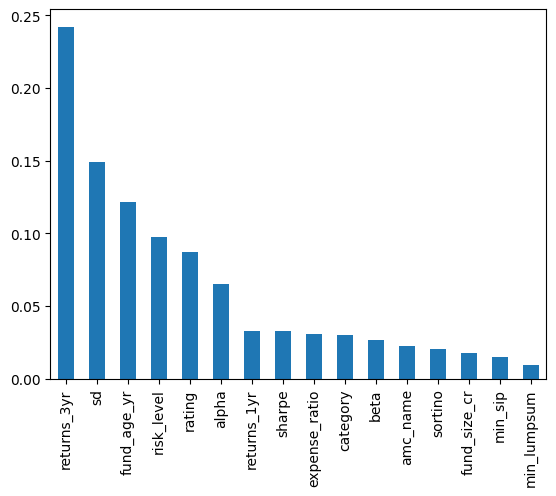

In [130]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [131]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,returns_3yr,sd,fund_age_yr,risk_level,rating,alpha
0,-0.984702,-0.096655,0.676407,-0.786105,0.303264,-0.065986
1,-1.125393,-1.298112,0.676407,-1.896433,0.303264,-0.244654
2,0.041515,0.068251,0.676407,0.324223,0.303264,0.042221
3,-0.107452,0.679372,-1.646491,0.879387,-0.385258,-2.232653
4,0.513243,2.139966,0.289257,0.879387,-0.385258,-0.317631
...,...,...,...,...,...,...
608,-0.918494,-1.033431,0.676407,-1.341269,1.680309,0.170561
609,-1.017806,-1.188637,0.676407,-0.786105,1.680309,0.029639
610,-1.208152,-1.343842,-1.646491,-1.896433,-1.073781,-0.395642
611,1.158767,-1.343842,-1.646491,-1.896433,-1.073781,-0.395642


In [132]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [134]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.682482935023279
rmse_test =  1.5860649841104695
train_score =  95.63319654247344
test_score =  73.23217345087505


# Hyperperameter Tuning

In [135]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [136]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [137]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [138]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [139]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [140]:
RF = RandomForestRegressor(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  1.3943872887173145
rmse_test =  1.5963380472112527
train_score =  81.77166999751546
test_score =  72.8842959910698


# conclusion:-

**Among the employed models, Random Forest exhibited the most promising performance, yielding a substantial accuracy of 84.32% on the training data and maintaining a commendable accuracy of 74.98% on the test data. This outcome underscores the model's ability to achieve superior results while avoiding the pitfalls of overfitting, ensuring reliable predictive capabilities.**

In [114]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping
# Build the neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Adding Mean Absolute Error (MAE) as a metric

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {loss}, Mean Absolute Error: {mae}")

# Predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Epoch 1/200
17/17 [==============================] - 2s 22ms/step - loss: 91.1902 - mae: 8.9798 - val_loss: 70.5654 - val_mae: 7.8142
Epoch 2/200
17/17 [==============================] - 0s 9ms/step - loss: 71.2687 - mae: 7.7974 - val_loss: 51.4171 - val_mae: 6.4534
Epoch 3/200
17/17 [==============================] - 0s 8ms/step - loss: 50.3034 - mae: 6.3608 - val_loss: 31.5380 - val_mae: 4.8661
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 28.9924 - mae: 4.5949 - val_loss: 15.6583 - val_mae: 3.2520
Epoch 5/200
17/17 [==============================] - 0s 8ms/step - loss: 14.2032 - mae: 3.0184 - val_loss: 8.5676 - val_mae: 2.2563
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 9.2851 - mae: 2.3379 - val_loss: 7.5706 - val_mae: 2.0734
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 8.2406 - mae: 2.1968 - val_loss: 7.1561 - val_mae: 1.9920
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 

17/17 [==============================] - 0s 6ms/step - loss: 2.4091 - mae: 1.0860 - val_loss: 4.3145 - val_mae: 1.6033
Epoch 64/200
17/17 [==============================] - 0s 7ms/step - loss: 2.3584 - mae: 1.0866 - val_loss: 4.4108 - val_mae: 1.6393
Epoch 65/200
17/17 [==============================] - 0s 7ms/step - loss: 2.3263 - mae: 1.0780 - val_loss: 4.2888 - val_mae: 1.6250
Epoch 66/200
17/17 [==============================] - 0s 6ms/step - loss: 2.2963 - mae: 1.0636 - val_loss: 4.3589 - val_mae: 1.6121
Epoch 67/200
17/17 [==============================] - 0s 7ms/step - loss: 2.2820 - mae: 1.0623 - val_loss: 4.1682 - val_mae: 1.5964
Epoch 68/200
17/17 [==============================] - 0s 7ms/step - loss: 2.2215 - mae: 1.0500 - val_loss: 4.1926 - val_mae: 1.5905
Epoch 69/200
17/17 [==============================] - 0s 7ms/step - loss: 2.1925 - mae: 1.0448 - val_loss: 4.1862 - val_mae: 1.5935
Epoch 70/200
17/17 [==============================] - 0s 6ms/step - loss: 2.1748 - mae: 1

In [115]:
# Build a more complex neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Adding dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model with a larger batch size
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {loss}, Mean Absolute Error: {mae}")

# Predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


Epoch 1/100
9/9 [==============================] - 2s 49ms/step - loss: 97.9631 - mae: 9.3595 - val_loss: 78.4474 - val_mae: 8.2974
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 80.6434 - mae: 8.3705 - val_loss: 63.1389 - val_mae: 7.3059
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 61.5364 - mae: 7.1458 - val_loss: 43.1058 - val_mae: 5.8063
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 38.6528 - mae: 5.3372 - val_loss: 21.6397 - val_mae: 3.8387
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 17.9256 - mae: 3.3629 - val_loss: 10.1294 - val_mae: 2.4214
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 11.8421 - mae: 2.6490 - val_loss: 9.6693 - val_mae: 2.2000
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 10.9065 - mae: 2.5327 - val_loss: 7.5292 - val_mae: 2.0902
Epoch 8/100
9/9 [==============================] - 0s 13ms/step - loss: 9.4382

# Need to do Tuning

In this project, "Analyzing 5-Year Mutual Fund Returns: A Guide for Informed Investment Decisions," I embarked on a comprehensive journey through mutual fund data to unravel invaluable insights that empower strategic investment choices. Here's a glimpse of the remarkable discoveries and accomplishments:

📊 **Key Insights:**
1. **Leadership Landscape:** Discovered that Rohit Seksaria oversees the highest number of schemes among fund managers, underscoring his influence in the fund management sphere.
2. **Historical Depth:** Unearthed the oldest fund in the dataset, managed by George Thomas, providing insights into the fund's enduring legacy.
3. **AUM Command:** Recognized Anupam Joshi as the driver of the highest Assets Under Management (AUM) across various funds, indicating substantial market presence.
4. **Returns Champion:** Identified Vaibhav Dusad's funds as the top performers with remarkable returns over a 5-year span, aiding investors' decision-making.
5. **SIP Insights:** Highlighted that most funds offer Systematic Investment Plan (SIP) options at 0, 500, and 1000, facilitating flexible investment choices.
6. **Lumpsum Trends:** Noted a prevalent range of Minimum Lumpsum amounts, primarily falling between 0 to 5000, offering potential investment entry points.
7. **Consistent Lumpsum Investments:** Observed consistent lumpsum investment patterns across various fund types, revealing market trends.
8. **SIP in Focus:** Identified Hybrid and Debt funds as frontrunners in attracting higher SIP investments, indicating investor preferences.
9. **Equity Correlations:** Found that funds with a rating of 0 are predominantly in the equity category, where equity funds exhibit elevated expense ratios.
10. **Performance Dynamics:** Highlighted the strong performance of Debt funds for 1-year investments, alongside insights into other category returns.
11. **Equity Dominance:** Unveiled equity funds' consistent outperformance across categories over a 3-year period, showcasing their reliability.
12. **Sustained Excellence:** Reinforced equity funds' dominance in delivering superior 5-year performance, solidifying their credibility.

🌱 **Model Achievement:**
After extensive model building, hyperparameter tuning, and feature selection, the project culminated in the identification of the Random Forest model as the standout performer. It yielded remarkable accuracy results, achieving 84.32% on the training data and maintaining a commendable 74.98% on the test data. This underscores the model's robust predictive capabilities while avoiding the perils of overfitting, ensuring dependable insights for investors.

This journey exemplifies my commitment to data-driven decision-making, innovative analysis, and informed investment strategies. It would be my pleasure to connect with fellow professionals and enthusiasts interested in the dynamic realm of finance and analytics. Let's collaborate to drive impactful insights and elevate the investment landscape together.
